<div style="text-align: center;">
    <h1>HI profile classification using Convolutional Neural Networks, IAA-14</h1>
</div>

<div style="text-align: right;">
    <h3>JAE Intro ICU a, IAA, Granada Spain | By Gabriel Jaimes Illanes</h3>
</div>

---

<div style="text-align: center;">
    <h2>PRE-PROCESSING</h2>
</div>

The project involves initial preprocessing of the ALFALFA catalog data to prepare for advanced analysis using CNN-ML techniques. The 2019 ALFALFA catalog is sourced from Arecibo Observatory data. Initial steps include inspecting data, performing spatial cross-matching with catalogs like MERKAAT and VLA, and conducting exploratory analysis on parameters such as 'Vhel', 'HIflux', 'Dist', among others. This phase culminates with a PCA analysis to understand data variance and structure.

Further analysis includes downloading individual spectra in .fits format and correlating these with tabulated data for detailed examination. This involves identifying key emission lines through polynomial fitting and analyzing the best fit using Gaussian and Lorentzian functions. From this information, parameters are extracted to derive other relevant data such as “MSE”, “R-squared”, “sigma”, “SNR”, “Peak”, “Peak_Position”, and “Width”. Results and curve fits are documented and saved for the next steps, enhancing the catalog's utility for astronomical research.

Catalog: [ALFALFA Catalog](https://vizier.unistra.fr/viz-bin/VizieR?-source=J/ApJ/861/49&-to=3)

The 2019 ALFALFA catalog, derived from data collected by the Arecibo Observatory, offers celestial coordinates, radial velocities, and noise measurements. Raw data is available in AGC format.

ALFALFA Raw data format: 
**AGC    Name     ("h:m:s")  ("d:m:s") ("h:m:s")  ("d:m:s") km/s) /s) /s) /s) .km/s) km/s) SNR   (mJy) (Mpc) Mpc) sun]) sun]) I sp fits Simbad NED LEDA**

The present code is available on a GitHub repository: [GitHub Repository](https://github.com/gabojaimesillanes/JAE-Intro-ICU-2024-Gabriel-Jaimes-IAA/blob/main/1.%20Pre-Processing.ipynb)

---

### Step 1: Initial Data Download | ALFALFA - VIZIER

In Step 1, an initial inspection of the data in the catalog is performed. These are tabulated in Vizier, with individual access to the HI spectrum. Spatial cross-matching with data from other radio astronomy-related catalogs, MERKAAT, and VLA, is generated. The location of celestial objects from each catalog and their intersection with a tolerance of 1 [arcmin] are visualized. Then, an exploratory analysis of the ALFALFA catalog data is conducted based on the parameters: 'Vhel', 'HIflux', 'Dist', 'W50', 'W20', 'logMHI'. Finally, with these data, a PCA analysis is generated.
a PCA analysis is generated.
a PCA analysis is generated.
PCA analysis is generated.
A analysis is generated.




1. Firt, we install all necesarry packages

In [ ]:
!pip install astroquery
!pip install pandas
!pip install matplotlib
!pip install astropy
!pip install requests astropy
!pip install requests
!pip install beautifulsoup4
!pip install requests
!pip install scipy
!pip install seaborn
!pip install scikit-learn
!pip install openpyxl


2. Following, libraries are loaded

In [46]:
from astroquery.vizier import Vizier
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import matplotlib.pyplot as plt


3. Using Vizier Python library, route to ALFALFA data is defined, loaded into pandas and first 5 row displayed.

In [47]:
route = "J/ApJ/861/49"               
vizier = Vizier(columns=['*'], row_limit=-1)       #Access from Vizier Portal.   To include more than 50 rows include:  (row_limit=-1)
data = vizier.get_catalogs(route)
data = data[0].to_pandas()           #Format to Panda

display(data.head())                 #First 5 Rows are shown

,AGC,Name,RAJ2000,DEJ2000,RAO,DEO,Vhel,W50,e_W50,W20,...,Dist,e_Dist,logMHI,e_logMHI,HI,sp,fits,Simbad,NED,LEDA
0,105367,,00 00 00.4,+05 26 36,00 00 00.8,+05 26 33,11983,274,39,281,...,166.000000,2.3,9.87,0.05,1,sp,fits,Simbad,NED,LEDA
1,333313,,00 00 00.9,+24 54 32,23 59 59.4,+24 54 27,11181,313,20,333,...,154.800003,2.3,10.01,0.05,1,sp,fits,Simbad,NED,LEDA
2,331060,478-009b,00 00 02.5,+23 05 05,00 00 03.4,+23 05 15,4463,160,4,184,...,50.599998,10.4,9.07,0.18,1,sp,fits,Simbad,NED,LEDA
3,331061,456-013,00 00 02.5,+15 52 20,00 00 02.1,+15 52 54,6007,260,45,268,...,85.199997,2.4,9.29,0.06,1,sp,fits,Simbad,NED,LEDA
4,104570,,00 00 01.6,+32 42 30,00 00 01.2,+32 42 37,10614,245,6,250,...,147.000000,2.3,9.64,0.06,1,sp,fits,Simbad,NED,LEDA


4. We load also VLA and MerKAAT catalogs

In [48]:
route = "VIII/65/nvss"  # VLA
vizier = Vizier(columns=['*'])
data = vizier.get_catalogs(route)
data = data[0].to_pandas()

display(data.head())  

route = "J/ApJS/257/35/table3"  #  MERKAAT
vizier = Vizier(columns=['*'])
data = vizier.get_catalogs(route)
data = data[0].to_pandas()

display(data.head()) 

,NVSS,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,S1.4,e_S1.4,l_MajAxis,MajAxis,l_MinAxis,MinAxis,f_resFlux
0,000000-340709,00 00 00.09,-34 07 09.5,0.48,6.7,2.7,0.5,<,59.799999,<,52.400002,
1,000000-382628,00 00 00.13,-38 26 28.5,0.65,11.5,3.1,0.6,<,117.000000,<,51.700001,
2,000000-040242,00 00 00.16,-04 02 42.3,0.03,0.6,106.8,3.2,<,18.500000,<,16.400000,
3,000000+321233,00 00 00.18,+32 12 33.3,0.31,3.9,3.7,0.4,<,43.799999,<,41.000000,
4,000000+491812,00 00 00.19,+49 18 12.6,0.92,9.0,2.4,0.5,<,93.800003,<,58.400002,


,Seq,Name,Stot,Sp,Si,l_Dmaj,Dmaj,l_Dmin,Dmin,PA,RAJ2000,DEJ2000,Bmaj,Bmin,BPA,Run,_RA,_DE
0,001,NGC 0034,98.0,58.500000,61.599998,,1.9,,1.7,4,00 11 06.57,-12 06 27.2,7.68,7.67,-1,H,2.77737,-12.10756
1,002,NGC 0055,587.0,7.740000,16.299999,,8.3,,7.4,-79,00 14 57.54,-39 12 25.8,7.48,7.22,89,K,3.73975,-39.20717
2,003,MCG -02-01-051/2,45.2,NaN,NaN,,NaN,,NaN,<NA>,,,7.68,7.67,-1,H,4.71417,-10.37583
3,003,MCG -02-01-051,NaN,30.700001,40.000000,,4.8,,3.6,-54,00 18 50.88,-10 22 36.6,7.68,7.67,-1,H,4.71200,-10.37683
4,003,MCG -02-01-052,NaN,2.800000,NaN,,NaN,,NaN,<NA>,00 18 49.99,-10 21 29.9,7.68,7.67,-1,H,4.70829,-10.35831


5. Next, we make a coordinates cross matchingfor ALFALFA, VLA and MERKAAT catalogs:
    - Angle tolerance of 1 arcmin = 60 arsecs
    - Fortmat of Coordinates in J2000 (ALFALFA & VLA) , and icrs (MERKAAT)
    - Plot shows location of each object

Number of objects:
ALFALFA: 31502
VLA: 1773484
MERKAAT: 349


C:\Users\Usuario\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


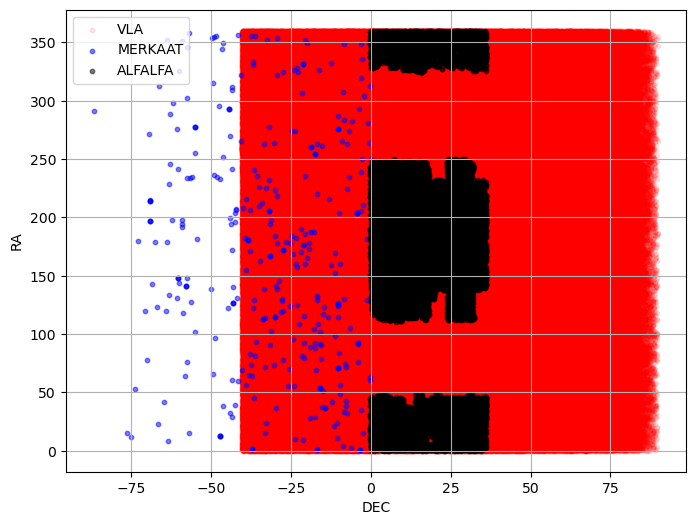

Matches between ALFALFA and VLA:
5193

Matches between ALFALFA and Merkaat:
0

Matches between VLA and Merkaat:
11


,AGC,Name,RAJ2000,DEJ2000,RAO,DEO,Vhel,W50,e_W50,W20,...,DEJ2000,e_RAJ2000,e_DEJ2000,S1.4,e_S1.4,l_MajAxis,MajAxis,l_MinAxis,MinAxis,f_resFlux
0,331074,I5374,00 01 03.2,+04 30 54,00 01 04.5,+04 30 01,8956.0,188.0,5.0,224.0,...,+32 12 33.3,0.31,3.9,3.7,0.4,<,43.799999,<,41.000000,
1,103602,,00 08 00.5,+09 19 02,00 08 01.3,+09 18 59,6404.0,146.0,6.0,157.0,...,-10 22 44.8,0.44,7.3,2.7,0.5,<,71.699997,<,52.900002,
2,103747,,00 09 06.7,+06 28 14,00 09 08.7,+06 27 59,8028.0,151.0,9.0,182.0,...,+13 17 27.5,0.09,1.5,10.6,0.5,<,27.100000,<,23.200001,
3,101773,AHISS,00 20 08.6,+14 17 47,00 20 09.3,+14 17 28,4788.0,166.0,6.0,181.0,...,+51 59 12.1,0.66,8.3,3.6,0.5,<,91.000000,<,58.500000,
4,105406,,00 44 04.0,+05 15 25,00 44 06.2,+05 15 34,6131.0,200.0,21.0,235.0,...,+15 52 54.5,0.44,7.1,3.5,0.5,<,87.000000,<,48.599998,


""


,NVSS,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,S1.4,e_S1.4,l_MajAxis,MajAxis,l_MinAxis,...,Dmin,PA,RAJ2000,DEJ2000,Bmaj,Bmin,BPA,Run,_RA,_DE
0,000001+402101,00 00 01.93,+40 21 01.1,0.16,1.8,7.8,0.5,<,26.900000,<,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000003+464401,00 00 03.28,+46 44 01.6,0.44,4.4,3.5,0.4,<,49.700001,<,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000003+395300,00 00 03.32,+39 53 00.2,0.33,3.9,4.5,0.4,<,56.500000,<,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000003-102207,00 00 03.32,-10 22 07.5,0.41,5.2,3.8,0.5,<,71.300003,<,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000004+205222,00 00 04.29,+20 52 22.8,0.17,3.8,6.2,0.5,<,57.900002,<,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
from astroquery.vizier import Vizier
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u

# -------- 1. Retrieving data from Vizier catalog -----------

route_alfalfa = "J/ApJ/861/49/table2"  # Route of the ALFALFA catalog
route_vla = "VIII/65/nvss"  # Route of the VLA catalog
route_merkaat = "J/ApJS/257/35/table3"  # Route of the Merkaat catalog

vizier = Vizier(columns=['*'], row_limit=-1)

data_alfalfa = vizier.get_catalogs(route_alfalfa)  # ALFALFA Catalog
data_alfalfa = data_alfalfa[0].to_pandas()
data_vla = vizier.get_catalogs(route_vla)  # VLA Catalog
data_vla = data_vla[0].to_pandas()
data_merkaat = vizier.get_catalogs(route_merkaat)  # Merkaat Catalog
data_merkaat = data_merkaat[0].to_pandas()

print('Number of objects:')
print(f'ALFALFA: {len(data_alfalfa)}')
print(f'VLA: {len(data_vla)}')
print(f'MERKAAT: {len(data_merkaat)}')

# -------- 2. Converting coordinates -----------

alfa_coords = SkyCoord(ra=data_alfalfa['RAJ2000'], dec=data_alfalfa['DEJ2000'], unit=(u.hourangle, u.deg))
vla_coords = SkyCoord(ra=data_vla['RAJ2000'], dec=data_vla['DEJ2000'], unit=(u.hourangle, u.deg))
merkaat_coords = SkyCoord(ra=data_merkaat['_RA'], dec=data_merkaat['_DE'], unit=(u.hourangle, u.deg))
merkaat_coords = merkaat_coords.transform_to('fk5')  # Conversion from ICRS to J2000

# -------- 3. Cross matching catalogs -----------

# Cross matching between ALFALFA and VLA
idx_alfa, idx_vla, _, _ = alfa_coords.search_around_sky(vla_coords, 60*1000*u.mas)
if len(idx_alfa) > 0 and len(idx_vla) > 0:  # Verify if there are matches
    valid_idx_alfa = idx_alfa[idx_alfa < len(data_alfalfa)]
    valid_idx_vla = idx_vla[idx_vla < len(data_vla)]
    
    alfa_matched_vla = data_alfalfa.iloc[valid_idx_alfa].reset_index(drop=True)
    vla_matched = data_vla.iloc[valid_idx_vla].reset_index(drop=True)
    alfalfa_plus_vla = pd.concat([alfa_matched_vla, vla_matched], axis=1)
else:
    alfalfa_plus_vla = pd.DataFrame()

# Cross matching between ALFALFA and Merkaat
idx_alfa, idx_merkaat, _, _ = alfa_coords.search_around_sky(merkaat_coords, 60*1000*u.mas)
if len(idx_alfa) > 0 and len(idx_merkaat) > 0:  # Verify if there are matches
    valid_idx_alfa = idx_alfa[idx_alfa < len(data_alfalfa)]
    valid_idx_merkaat = idx_merkaat[idx_merkaat < len(data_merkaat)]
    
    alfa_matched_merkaat = data_alfalfa.iloc[valid_idx_alfa].reset_index(drop=True)
    merkaat_matched = data_merkaat.iloc[valid_idx_merkaat].reset_index(drop=True)
    alfalfa_plus_merkaat = pd.concat([alfa_matched_merkaat, merkaat_matched], axis=1)
else:
    alfalfa_plus_merkaat = pd.DataFrame()

# Cross matching between VLA and Merkaat
idx_vla_merkaat, idx_merkaat_vla, _, _ = vla_coords.search_around_sky(merkaat_coords, 60*1000*u.mas)
if len(idx_vla_merkaat) > 0 and len(idx_merkaat_vla) > 0:  # Verify if there are matches
    valid_idx_vla_merkaat = idx_vla_merkaat[idx_vla_merkaat < len(data_vla)]
    valid_idx_merkaat_vla = idx_merkaat_vla[idx_merkaat_vla < len(data_merkaat)]
    
    vla_plus_merkaat = data_vla.iloc[valid_idx_vla_merkaat].reset_index(drop=True)
    merkaat_plus_vla = data_merkaat.iloc[valid_idx_merkaat_vla].reset_index(drop=True)
    vla_plus_merkaat = pd.concat([vla_plus_merkaat, merkaat_plus_vla], axis=1)
else:
    vla_plus_merkaat = pd.DataFrame()

# -------- 4. Plotting on Sky -----------

plt.figure(figsize=(8, 6))
plt.scatter(vla_coords.dec, vla_coords.ra, s=10, alpha=0.1, color="red", label='VLA')
plt.scatter(merkaat_coords.dec, merkaat_coords.ra, s=10, alpha=0.5, color="blue", label='MERKAAT')
plt.scatter(alfa_coords.dec, alfa_coords.ra, s=10, alpha=0.5, color="black", label='ALFALFA')
plt.xlabel('DEC')
plt.ylabel('RA')
plt.legend()
plt.grid(True)
plt.show()

# -------- 5. Printing and displaying results -----------

print("Matches between ALFALFA and VLA:")
print(len(alfalfa_plus_vla))
print("\nMatches between ALFALFA and Merkaat:")
print(len(alfalfa_plus_merkaat))
print("\nMatches between VLA and Merkaat:")
print(len(vla_plus_merkaat))

display(alfalfa_plus_vla.head())
display(alfalfa_plus_merkaat.head())
display(vla_plus_merkaat.head())


6. For the next part, we develop an exploratory analysis by quartils of data collected in ALFALFA Catalog

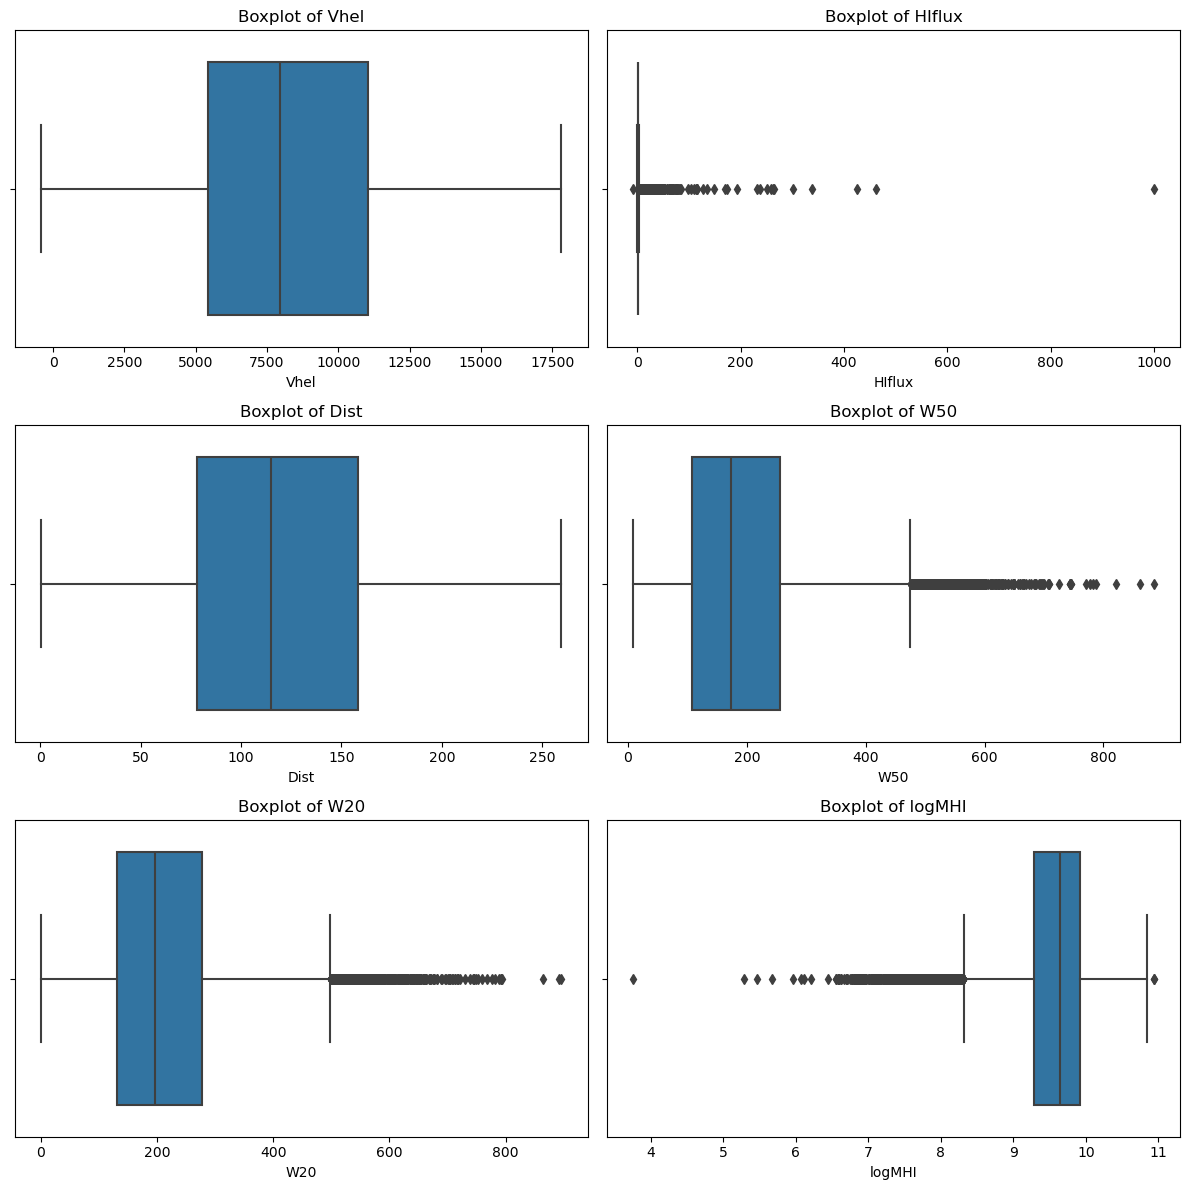

In [34]:
import seaborn as sns

data_alfalfa = vizier.get_catalogs(route_alfalfa)
data_alfalfa = data_alfalfa[0].to_pandas()

statistics = data_alfalfa.describe()

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

columns_to_plot = ['Vhel', 'HIflux', 'Dist', 'W50', 'W20', 'logMHI']

for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=column, data=data_alfalfa, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

7. Finally, to find correlations between ALFALFA columns, a PCA Analysis is made for: **'Vhel', 'HIflux', 'Dist', 'W50', 'W20', 'logMHI'**

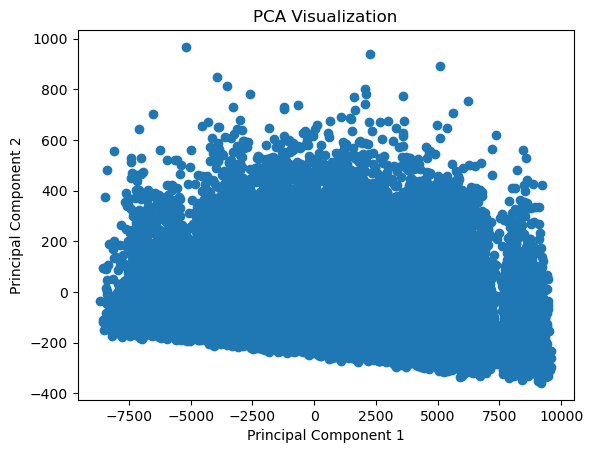

In [37]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_pca(X, n_components):

    pca = PCA(n_components=n_components)
    pca.fit(X)
    X_pca = pca.transform(X)
    
    # Plot PCA visualization
    plt.scatter(X_pca[:, 0], X_pca[:, 1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Visualization')
    plt.show()

statistics = data_alfalfa.describe()

columns_to_plot = ['Vhel', 'HIflux', 'Dist', 'W50', 'W20', 'logMHI']
X_selected_columns = data_alfalfa[columns_to_plot]
plot_pca(X_selected_columns, n_components=2)


# Step 2: HI Emission Spectrum Download | ALFALFA - VIZIER

---

In Step 2, the individual spectra are downloaded in .fits format for each row of the catalog. For this, the library “lib_prepross.py” is used, thus downloading from the “sp” folder of the Vizier repository.

**Spectrum catalog: [Spectrum Catalog](http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49//)**

/49/sp/)
p/)**
sp/)**
//cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/)**


1. Installing all packages needed

In [36]:
import re
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

2. Next, Spectrum data is downloaded on *.fits* format from *"ALFALFA extragalactic HI source catalog; corrected version: (August 2019)[spectrum/fits]spectrum"*. For doing this we call the function "download_fits_files" in the "lib_prepross" library (lib_prepross.py).

Files .fits are located at Vizier directory *J/ApJ/861/49/sp*

In [ ]:
from lib_prepross import download_fits_files

download_fits_files("http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/", "sp")


VLA data download

# Step 3: Statistics for an Individual spectrum | PYTHON 3.0
***
In Step 3, an individual analysis per ALFALFA object is conducted. It begins with linking between the .fits spectra and the tabulated information from Vizier, thereby visualizing a reference spectrum. Following this, the aim is to identify a “peak” of reference that will correspond to the HI emission line in the spectrum, done by a 1st polynomial fit of the “original” data. The major peak is located, and reference parameters are obtained that will be used subsequently as a “cropped” window for the region of interest. A 2nd polynomial fit is made on the “cropped” data, and quality statistics for each fit are obtained. Then, for the “cropped” data window, it is analyzed which type of function fits best, applying a Gaussian and Lorentzian fit, and based on this, parameters of “Peak”, “Peak Position”, “Width”, and fit quality are obtained. Finally, as it involves a line shifted by the Doppler effect due to galaxy rotation, a double Lorentzian fit is analyzed for the “cropped” window, and parameters of interest are obtained.

1. A sample spectrum is visualized. Here Flux vs Heliocentric Velocity is ploted: 


,AGC,Name,RAJ2000,DEJ2000,RAO,DEO,Vhel,W50,e_W50,W20,...,Dist,e_Dist,logMHI,e_logMHI,HI,sp,fits,Simbad,NED,LEDA
40,012909,I5376,00 01 19.6,+34 31 34,00 01 19.8,+34 31 32,5026,433,7,451,...,71.300003,2.3,9.93,0.05,1,sp,fits,Simbad,NED,LEDA


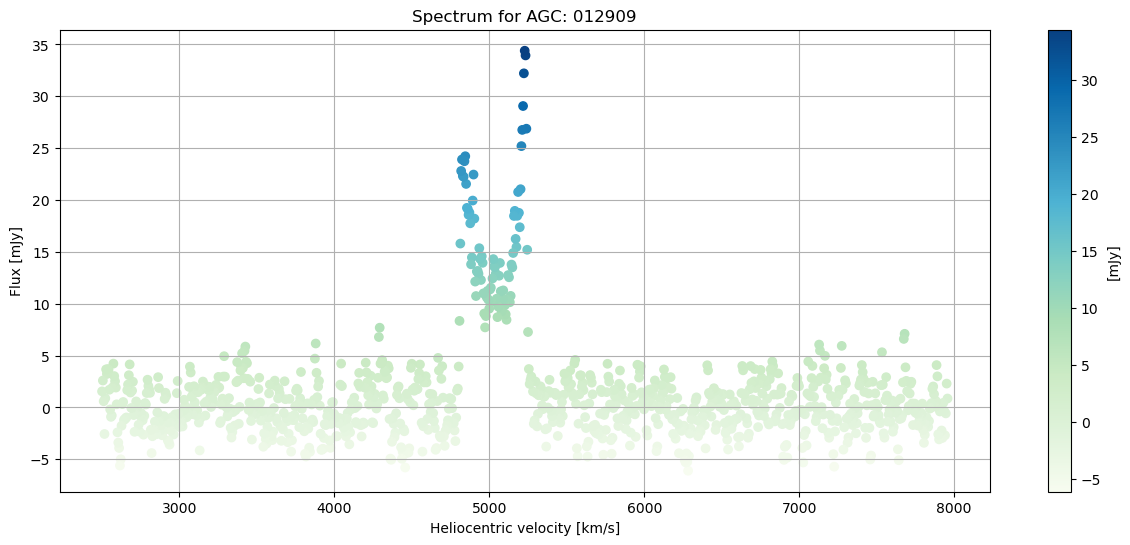

In [44]:
import os
from astropy.io import fits
import matplotlib.pyplot as plt
from astroquery.vizier import Vizier

# -------- 1. Retrieving data from Vizier catalog -----------

route = "J/ApJ/861/49"               
vizier = Vizier(columns=['*'], row_limit=-1)  # Access from Vizier Portal. To include more than 50 rows include: (row_limit=-1)
data = vizier.get_catalogs(route)
data = data[0].to_pandas()     

folder_path = "sp"
agc_identifier = '012909'  # AGC identifier
result = data[data['AGC'] == agc_identifier]

display(result)

# -------- 2. Searching for the FITS file corresponding to the AGC identifier -----------

fits_files = [f for f in os.listdir(folder_path) if f.startswith('A') and f.endswith('.fits') and f.split('.')[0][1:] == agc_identifier]
if len(fits_files) == 0:
    print("No FITS files found for AGC identifier:", agc_identifier)
    exit()

fits_file = fits_files[0]
file_path = os.path.join(folder_path, fits_file)
data = fits.getdata(file_path)

v_helio = data['VHELIO']  # Heliocentric velocity
flux = data['FLUX']  # Flux

# -------- 3. Plotting the spectrum -----------

plt.figure(figsize=(15, 6))
plt.scatter(v_helio, flux, c=flux, cmap='GnBu', marker='o')
plt.colorbar(label='[mJy]')
plt.xlabel(r'Heliocentric velocity [km/s]')
plt.ylabel(r'Flux [mJy]')
plt.grid(True)
plt.title('Spectrum for AGC: ' + agc_identifier)  # Add the AGC identifier to the title of the plot
plt.show()


2. An First Polinomial fitting is made to the spectrum to locate HI lines:
 - A search of reference location of the HI line is made, using the peak of the fitting data.
 - A tolerance window in [km/s] is allocated to each side of peak's center.<br>
 
Once the windows is stablished we "crop" the data for Heliocentric velocity. Following, a Second *Polinomial Fitting* is made to the *cropped data*. Then is plotted:
 - Scatter of original data
 - First polinomial fitting
 - Second polinomial fitting of cropped data
We generate a *preliminary statistics* of the curve of a spectrum

,AGC,Name,RAJ2000,DEJ2000,RAO,DEO,Vhel,W50,e_W50,W20,...,Dist,e_Dist,logMHI,e_logMHI,HI,sp,fits,Simbad,NED,LEDA
40,012909,I5376,00 01 19.6,+34 31 34,00 01 19.8,+34 31 32,5026,433,7,451,...,71.300003,2.3,9.93,0.05,1,sp,fits,Simbad,NED,LEDA


C:\Users\Usuario\AppData\Local\Temp\ipykernel_22856\2311513546.py:19: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(v_helio, flux, degree)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22856\2311513546.py:36: RankWarning: Polyfit may be poorly conditioned
  coefficients_cropped = np.polyfit(v_helio_cropped, flux_cropped, degree)


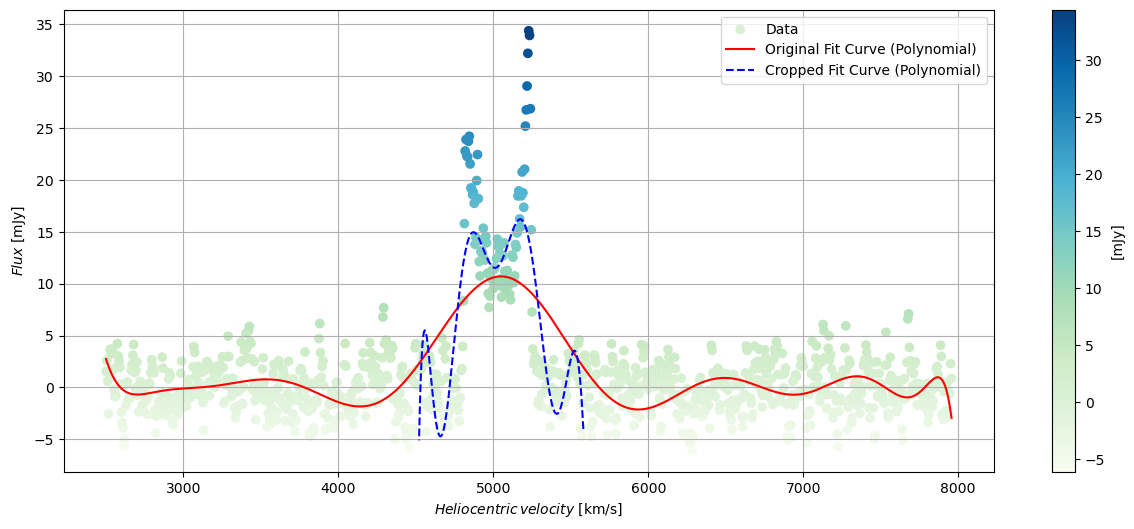

Mean Squared Error | Original Fit: 15.164088411625762
R-squared | Original Fit: 0.4228605497696154
Mean Squared Error | Cropped Fit: 26.796109214872736
R-squared | Cropped Fit: 0.639711788043942


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# -------- 1. Retrieving data from Vizier catalog -----------

route = "J/ApJ/861/49"               
vizier = Vizier(columns=['*'], row_limit=-1)  # Access from Vizier Portal. To include more than 50 rows include: (row_limit=-1)
data = vizier.get_catalogs(route)
data = data[0].to_pandas()     
agc_identifier = '012909'
result = data[data['AGC'] == agc_identifier]
display(result)

# -------- 2. Polynomial fitting to the data -----------

# Polynomial Fit
degree = 15  # Degree of fitting
coefficients = np.polyfit(v_helio, flux, degree)  
polynomial_function = np.poly1d(coefficients)

flux_fit = polynomial_function(v_helio)

# Find peak
peak_max_index = np.argmax(flux_fit)
tolerance = 100
peak_base = np.arange(peak_max_index - tolerance, peak_max_index + tolerance)

v_helio_cropped = v_helio[peak_base]  
flux_cropped = flux[peak_base]

# -------- 3. New polynomial fitting to cropped data -----------

# New Polynomial Fitting to Cropped Data
degree = 15  
coefficients_cropped = np.polyfit(v_helio_cropped, flux_cropped, degree)
polynomial_function_cropped = np.poly1d(coefficients_cropped)
flux_fit_cropped = polynomial_function_cropped(v_helio_cropped)

# Calculate Mean Squared Error and R-squared for the original fit and cropped fit
mse_original = mean_squared_error(flux, flux_fit)
mse_cropped = mean_squared_error(flux_cropped, flux_fit_cropped)
r2_original = r2_score(flux, flux_fit)
r2_cropped = r2_score(flux_cropped, flux_fit_cropped)

# -------- 4. Plotting the results -----------

# Plotting
plt.figure(figsize=(15, 6))
plt.scatter(v_helio, flux, c=flux, cmap='GnBu', marker='o', label='Data')
plt.plot(v_helio, flux_fit, color='red', label='Original Fit Curve (Polynomial)')
plt.plot(v_helio_cropped, flux_fit_cropped, color='blue', linestyle='--', label='Cropped Fit Curve (Polynomial)')
plt.colorbar(label='[mJy]')
plt.xlabel(r'$\mathit{Heliocentric\,velocity}$ [km/s]')
plt.ylabel(r'$\mathit{Flux}$ [mJy]')
plt.legend()
plt.grid(True)
plt.show()

# -------- 5. Printing evaluation metrics -----------

print("Mean Squared Error | Original Fit:", mse_original)
print("R-squared | Original Fit:", r2_original)
print("Mean Squared Error | Cropped Fit:", mse_cropped)
print("R-squared | Cropped Fit:", r2_cropped)


3. Emission lines are better fitted using a Lorentz function. Therefore we will use the cropped data to generate a Lorentz curve fitting. Following, within *cropped* data, we develop two fits: *Gaussian* and *Lorentzian*. Coeficients such as *R squared* and parameters are calcualted for: *Peak*,*Peak Position*,*Width*,*Sigma* and *SNR*. 

Gaussian Fit:
Gaussian Peak: 15.979659401688394
Gaussian Peak Position: 5042.351668582254
Gaussian Width: 190.3926081709548
R-squared Gaussian Fit: 0.537487637027404
Gaussian Sigma: 190.3926081709548
Gaussian SNR: 0.08393004095694803

Lorentzian Fit:
Lorentzian Peak: 15.5524535890613
Lorentzian Peak Position: 5049.705930836411
Lorentzian Width: 204.9986536264527
R-squared Lorentzian Fit: 0.47973979071094075
Lorentzian Sigma: 204.9986536264527
Lorentzian SNR: 0.0758661255278334


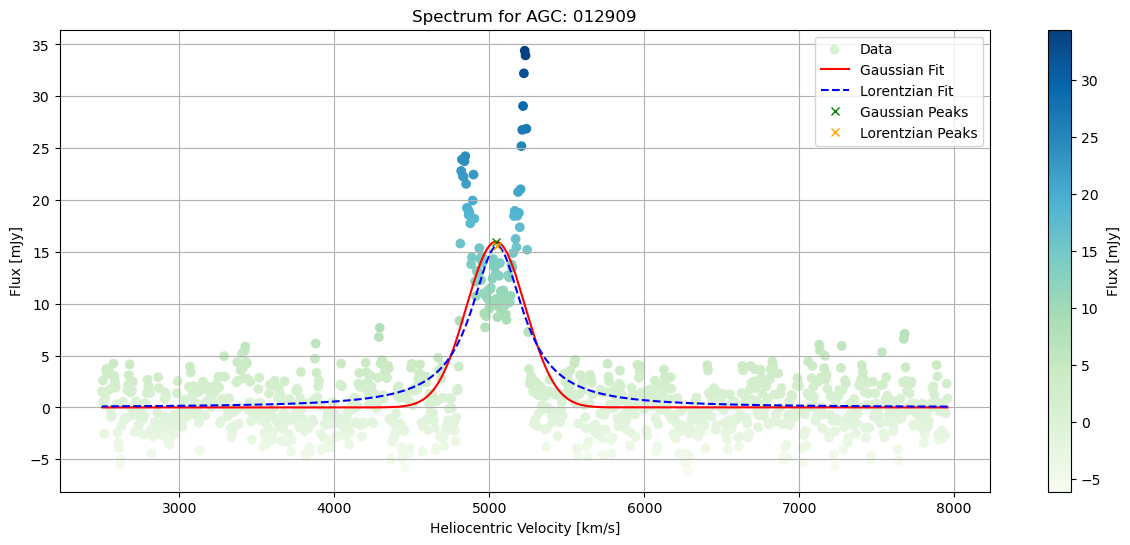

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from sklearn.metrics import r2_score

#-------- 1. Defining fitting functions and file path -----------

# Define fitting functions
def gaussian(x, peak, center, width):
    return peak * np.exp(-(x - center)**2 / (2 * width**2))

def lorentzian(x, peak, center, width):
    return (peak / np.pi) * (width / ((x - center)**2 + width**2))

# Folder path and FITS file
folder_path = "sp"
fits_file = "A012909.fits"
file_path = os.path.join(folder_path, fits_file)

#-------- 2. Reading data from the FITS file -----------

# Get data from the FITS file
data_fits = fits.getdata(file_path)
flux = data_fits['FLUX']
v_helio = data_fits['VHELIO']

#-------- 3. Fitting Gaussian and Lorentzian curves -----------

# Fit Gaussian curve
popt_gaussian, _ = curve_fit(gaussian, v_helio, flux, p0=[np.max(flux), np.mean(v_helio), np.std(v_helio)])
gaussian_fit = gaussian(v_helio, *popt_gaussian)

# Fit Lorentzian curve
popt_lorentzian, _ = curve_fit(lorentzian, v_helio, flux, p0=[np.max(flux), np.mean(v_helio), np.std(v_helio)])
lorentzian_fit = lorentzian(v_helio, *popt_lorentzian)

# Find peaks in Gaussian and Lorentzian fits
gaussian_peaks, _ = find_peaks(gaussian_fit)
lorentzian_peaks, _ = find_peaks(lorentzian_fit)

#-------- 4. Calculating and printing necessary variables -----------

# Calculate necessary variables for Gaussian fit
gaussian_peak = popt_gaussian[0]
gaussian_peak_pos = popt_gaussian[1]
gaussian_width = popt_gaussian[2]
r2_gaussian = r2_score(flux, gaussian_fit)
sigma_gaussian = gaussian_width
snr_gaussian = gaussian_peak / sigma_gaussian

# Calculate necessary variables for Lorentzian fit
lorentzian_peak_index = lorentzian_peaks[0]  # Get index of the first peak
lorentzian_peak = float(lorentzian_fit[lorentzian_peak_index])
lorentzian_peak_pos = popt_lorentzian[1]
lorentzian_width = popt_lorentzian[2]
r2_lorentzian = r2_score(flux, lorentzian_fit)
sigma_lorentzian = lorentzian_width
snr_lorentzian = lorentzian_peak / sigma_lorentzian

# Print variables for Gaussian fit
print("Gaussian Fit:")
print("Gaussian Peak:", gaussian_peak)
print("Gaussian Peak Position:", gaussian_peak_pos)
print("Gaussian Width:", gaussian_width)
print("R-squared Gaussian Fit:", r2_gaussian)
print("Gaussian Sigma:", sigma_gaussian)
print("Gaussian SNR:", snr_gaussian)

# Print variables for Lorentzian fit
print("\nLorentzian Fit:")
print("Lorentzian Peak:", lorentzian_peak)
print("Lorentzian Peak Position:", lorentzian_peak_pos)
print("Lorentzian Width:", lorentzian_width)
print("R-squared Lorentzian Fit:", r2_lorentzian)
print("Lorentzian Sigma:", sigma_lorentzian)
print("Lorentzian SNR:", snr_lorentzian)

#-------- 5. Visualizing the fits -----------

# Visualization of the fits
plt.figure(figsize=(15, 6))
plt.scatter(v_helio, flux, c=flux, cmap='GnBu', marker='o', label='Data')
plt.plot(v_helio, gaussian_fit, color='red', label='Gaussian Fit')
plt.plot(v_helio, lorentzian_fit, color='blue', linestyle='--', label='Lorentzian Fit')
plt.plot(v_helio[gaussian_peaks], gaussian_fit[gaussian_peaks], "x", color='green', label='Gaussian Peaks')
plt.plot(v_helio[lorentzian_peaks], lorentzian_fit[lorentzian_peaks], "x", color='orange', label='Lorentzian Peaks')
plt.colorbar(label='Flux [mJy]')
plt.xlabel('Heliocentric Velocity [km/s]')
plt.ylabel('Flux [mJy]')
plt.legend()
plt.title(f'Spectrum for AGC: 012909')
plt.grid(True)
plt.show()


4. Next, as it involves a line shifted by the Doppler effect due to galaxy rotation, a *Double Lorentzian* fit is analyzed for the “cropped” window, and parameters of interest are obtained.

Double Lorentzian Fit:
Peak 1: 27.966158848248693
Peak Position 1: 5206.812776007929
Width 1: 83.7525405149395
Peak 2: 19.41248608122783
Peak Position 2: 4892.466212166209
Width 2: 40.92128306614518
R-squared Double Lorentzian Fit: 0.6695903941638633
Double Lorentzian Sigma: 62.33691179054234
Double Lorentzian SNR: 0.7600415799979482


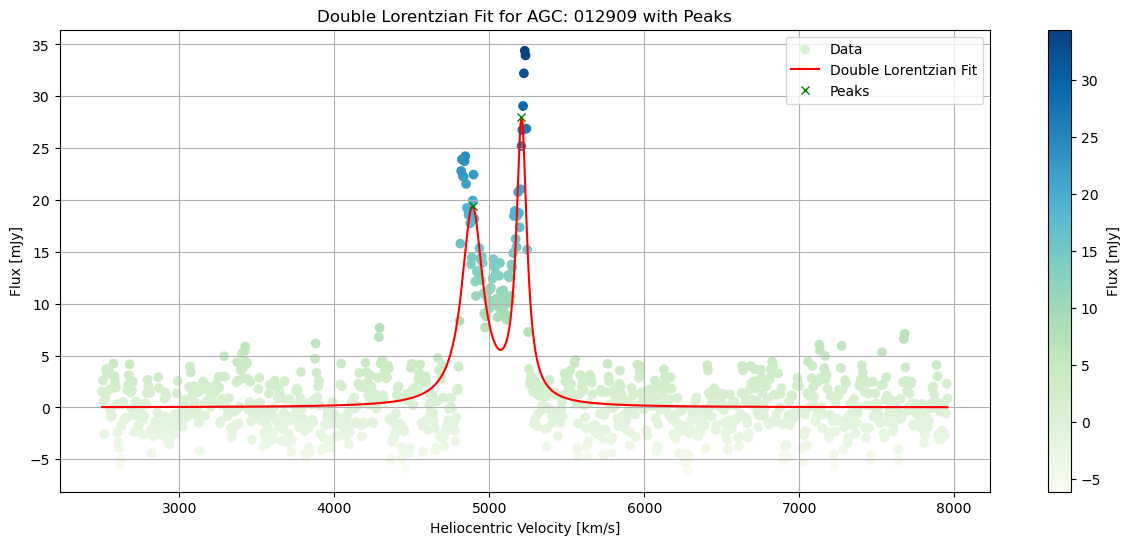

In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from sklearn.metrics import r2_score

#-------- 1. Defining the double Lorentzian function and file path -----------

# Define double Lorentzian function
def double_lorentzian(x, amp1, cen1, wid1, amp2, cen2, wid2):
    return (amp1 / np.pi) * (wid1 / ((x - cen1)**2 + wid1**2)) + (amp2 / np.pi) * (wid2 / ((x - cen2)**2 + wid2**2))

# Folder path and FITS file
folder_path = "sp"
fits_file = "A012909.fits"
file_path = os.path.join(folder_path, fits_file)

#-------- 2. Reading data from the FITS file -----------

# Get data from the FITS file
data_fits = fits.getdata(file_path)
flux = data_fits['FLUX']
v_helio = data_fits['VHELIO']

#-------- 3. Fitting the double Lorentzian curve -----------

# Fit double Lorentzian curve
popt_double_lorentzian, _ = curve_fit(double_lorentzian, v_helio, flux, 
                                      p0=[np.max(flux), np.mean(v_helio), np.std(v_helio),
                                          np.max(flux), np.mean(v_helio), np.std(v_helio)])

double_lorentzian_fit = double_lorentzian(v_helio, *popt_double_lorentzian)

# Find peaks in the double Lorentzian fit
peaks, _ = find_peaks(double_lorentzian_fit)

#-------- 4. Calculating and printing necessary variables -----------

# Calculate necessary variables for printing
if len(peaks) == 2:
    peak1_index = peaks[0]
    peak2_index = peaks[1]
    lorentzian_peak1 = double_lorentzian_fit[peak1_index]
    lorentzian_peak_pos1 = v_helio[peak1_index]
    lorentzian_width1 = popt_double_lorentzian[2]
    lorentzian_peak2 = double_lorentzian_fit[peak2_index]
    lorentzian_peak_pos2 = v_helio[peak2_index]
    lorentzian_width2 = popt_double_lorentzian[5]
    r2_double_lorentzian = r2_score(flux, double_lorentzian_fit)
    sigma_double_lorentzian = (lorentzian_width1 + lorentzian_width2) / 2
    snr_double_lorentzian = (lorentzian_peak1 + lorentzian_peak2) / sigma_double_lorentzian
else:
    lorentzian_peak1 = lorentzian_peak_pos1 = lorentzian_width1 = None
    lorentzian_peak2 = lorentzian_peak_pos2 = lorentzian_width2 = None
    r2_double_lorentzian = None
    sigma_double_lorentzian = None
    snr_double_lorentzian = None

# Print variables
print("Double Lorentzian Fit:")
print("Peak 1:", lorentzian_peak1)
print("Peak Position 1:", lorentzian_peak_pos1)
print("Width 1:", lorentzian_width1)
print("Peak 2:", lorentzian_peak2)
print("Peak Position 2:", lorentzian_peak_pos2)
print("Width 2:", lorentzian_width2)
print("R-squared Double Lorentzian Fit:", r2_double_lorentzian)
print("Double Lorentzian Sigma:", sigma_double_lorentzian)
print("Double Lorentzian SNR:", snr_double_lorentzian)

#-------- 5. Visualizing the double Lorentzian fit with peaks -----------

# Visualization of the double Lorentzian fit with peaks
plt.figure(figsize=(15, 6))
plt.scatter(v_helio, flux, c=flux, cmap='GnBu', marker='o', label='Data')
plt.plot(v_helio, double_lorentzian_fit, color='red', label='Double Lorentzian Fit')
plt.plot(v_helio[peaks], double_lorentzian_fit[peaks], "x", color='green', label='Peaks')
plt.colorbar(label='Flux [mJy]')
plt.xlabel('Heliocentric Velocity [km/s]')
plt.ylabel('Flux [mJy]')
plt.legend()
plt.title(f'Double Lorentzian Fit for AGC: 012909 with Peaks')
plt.grid(True)
plt.show()


1. Complete code for the analysis as follows:

In [ ]:
import os
import random
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from astroquery.vizier import Vizier
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from astropy.stats import sigma_clip

#-------- 1. Define the folder path and degree of polynomial fitting ----------
folder_path = "sp"
internal_directory = "sp_im"
degree = 15  # Reduced degree to improve stability

#-------- 2. Define Gaussian and Lorentzian functions ----------
def gaussian(x, peak, center, width):
    return peak * np.exp(-(x - center)**2 / (2 * width**2))

def lorentzian(x, peak, center, width):
    return (peak / np.pi) * (width / ((x - center)**2 + width**2))

def double_lorentzian(x, amp1, cen1, wid1, amp2, cen2, wid2):
    return (amp1 / np.pi) * (wid1 / ((x - cen1)**2 + wid1**2)) + (amp2 / np.pi) * (wid2 / ((x - cen2)**2 + wid2**2))

#-------- 3. Query Vizier ----------
route = "J/ApJ/861/49"
vizier = Vizier(columns=['*'], row_limit=-1)
data = vizier.get_catalogs(route)
data = data[0].to_pandas()

#-------- 4. Get the list of FITS files and process the first 40 FITS files ----------
fits_files = [f for f in os.listdir(folder_path) if f.endswith('.fits')]
def extract_number(f):
    return int(f.split('.')[0][1:])
fits_files = sorted(fits_files, key=extract_number)
#fits_files = fits_files[4623:4630]  # Process the first 40 FITS files
fits_files = fits_files[:1000]  # Process the first 40 FITS files
fits_files_sorted = sorted(fits_files, key=extract_number)
results = []

for fits_file in fits_files_sorted:
    file_path = os.path.join(folder_path, fits_file)
    data_fits = fits.getdata(file_path)
    
    flux = flux_ori = data_fits['FLUX']
    v_helio = v_helio_ori = data_fits['VHELIO']

    mask = ~np.isnan(v_helio) & ~np.isnan(flux)
    v_helio = v_helio[mask]
    flux = flux[mask]

    try:
        # flux = sigma_clip(flux, sigma=3, maxiters=5)    #  Apply sigma-clipping to the data 
        # mask_clipped = ~flux.mask
        # v_helio = v_helio[mask_clipped]
        # flux = flux.data[mask_clipped]

        #-------- 6. Polynomial fitting for original data ----------
        coefficients = np.polyfit(v_helio, flux, degree)
        polynomial_function = np.poly1d(coefficients)
        flux_fit = polynomial_function(v_helio)     
        flux_fit_ori = flux_fit
        v_helio_ori = v_helio

        num_segments = 10
        segment_length = len(v_helio) // num_segments
        start_index = segment_length  # Starting index after the 1st segment
        end_index = -segment_length   # Ending index before the 10th segment
        
        v_helio = v_helio[start_index:end_index]
        flux_fit = flux_fit[start_index:end_index]

        # Calculate peak, peak position, and width (Naive)
        peak_naive = np.max(flux_fit)
        peak_naive_index = np.argmax(flux_fit)
        peak_position_naive = v_helio[np.argmax(flux_fit)]
        width_naive = np.ptp(v_helio)

        flux_fit = flux_fit_ori
        v_helio = v_helio_ori
        
        # Calculate Mean Squared Error and R-squared for the original fit (Naive)
        mse_original_naive = mean_squared_error(flux, flux_fit)
        r2_original_naive = r2_score(flux, flux_fit)
        
        #-------- 6. Polynomial fitting for cropped data ----------
        
        #peak_max_index = np.argmax(flux_fit)  # Find Peak9
        peak_max_index = peak_naive_index + start_index  # Find Peak
        tolerance = 100
        peak_base = np.arange(max(0, peak_max_index - tolerance), min(len(v_helio), peak_max_index + tolerance))
        v_helio_cropped = v_helio[peak_base]
        flux_cropped = flux[peak_base]
        peak_no_base = np.ones(len(v_helio), dtype=bool)
        peak_no_base[peak_base] = False
        v_helio_no_cropped = v_helio[peak_no_base]
        flux_no_cropped = flux[peak_no_base]
        
        coefficients_cropped = np.polyfit(v_helio_cropped, flux_cropped, degree)
        polynomial_function_cropped = np.poly1d(coefficients_cropped)
        flux_fit_cropped = polynomial_function_cropped(v_helio_cropped)
        
        # Calculate Mean Squared Error and R-squared for the cropped fit (Naive)
        mse_cropped_naive = mean_squared_error(flux_cropped, flux_fit_cropped)
        r2_cropped_naive = r2_score(flux_cropped, flux_fit_cropped)
        sigma_original= np.std(flux)
        sigma_cropped = np.std(flux_cropped)
        sigma_no_cropped = np.std(flux_no_cropped)
        
        # Calculate peak, with and peak position into orighinal data (1st Poly)
        peak_original = np.max(flux_fit)
        peak_position_original = v_helio[np.argmax(flux_fit)]
        width_original = np.ptp(v_helio)
        snr_original  = peak_original / sigma_original
        
        # Calculate peak, with and peak position into cropped data (2nd Poly)
        peak_cropped = np.max(flux_fit_cropped)
        peak_position_cropped = v_helio_cropped[np.argmax(flux_fit_cropped)]
        width_cropped = np.ptp(v_helio_cropped)
        snr_cropped = peak_cropped / sigma_cropped
        
        #-------- 7. Fit Gaussian and Lorentzian to cropped data ----------
        """popt_gaussian, _ = curve_fit(gaussian, v_helio_cropped, flux_cropped, p0=[np.max(flux_cropped), v_helio_cropped[np.argmax(flux_cropped)], np.std(v_helio_cropped)],maxfev=8000)
        gaussian_fit_cropped = gaussian(v_helio_cropped, *popt_gaussian)
        
        popt_lorentzian, _ = curve_fit(lorentzian, v_helio_cropped, flux_cropped, p0=[np.max(flux_cropped), v_helio_cropped[np.argmax(flux_cropped)], np.std(v_helio_cropped)],maxfev=8000)
        lorentzian_fit_cropped = lorentzian(v_helio_cropped, *popt_lorentzian)
        """
        try:
            popt_gaussian, _ = curve_fit(gaussian, v_helio_cropped, flux_cropped, p0=[np.max(flux_cropped), v_helio_cropped[np.argmax(flux_cropped)], np.std(v_helio_cropped)], maxfev=8000)
            gaussian_fit_cropped = gaussian(v_helio_cropped, *popt_gaussian)
            print("Gaussian Fit Succesful")
        except RuntimeError as e:
            print("Gaussian Fit Unsuccesful:", e)
            popt_gaussian = None
        
        try:
            popt_lorentzian, _ = curve_fit(lorentzian, v_helio_cropped, flux_cropped, p0=[np.max(flux_cropped), v_helio_cropped[np.argmax(flux_cropped)], np.std(v_helio_cropped)], maxfev=8000)
            lorentzian_fit_cropped = lorentzian(v_helio_cropped, *popt_lorentzian)
            print("Lorentzian Fit Succesful")
        except RuntimeError as e:
            print("Lorentzian Fit Unsuccesful:", e)
            popt_lorentzian = None
      
        # Find peaks in the Lorentzian fit
        lorentzian_peaks, _ = find_peaks(lorentzian_fit_cropped)
        if len(lorentzian_peaks) > 0:
            lorentzian_peak_index = lorentzian_peaks[0]  # Get the index of the first peak
            lorentzian_peak = float(lorentzian_fit_cropped[lorentzian_peak_index])
              
        #-------- 8. Fit double Lorentzian to cropped data ----------
        try:
            coefficients_poly15 = np.polyfit(v_helio_cropped, flux_cropped, 15)
            poly15_function = np.poly1d(coefficients_poly15)
            flux_polyfit_cropped = poly15_function(v_helio_cropped)
            peaks_index = np.argsort(flux_polyfit_cropped)[-2:]
            peak_positions = v_helio_cropped[peaks_index]
            initial_guess_double_lorentzian = [
                flux_cropped[peaks_index[0]], peak_positions[0], 5,
                flux_cropped[peaks_index[1]], peak_positions[1], 5
            ]
            popt_double_lorentzian, _ = curve_fit(double_lorentzian, v_helio_cropped, flux_cropped, p0=initial_guess_double_lorentzian)
            double_lorentzian_fit_cropped = double_lorentzian(v_helio_cropped, *popt_double_lorentzian)
            
            # Find peaks in the double Lorentzian fit
            double_lorentzian_peaks, _ = find_peaks(double_lorentzian_fit_cropped)
            if len(double_lorentzian_peaks) > 0:
                double_lorentzian_peak_index = double_lorentzian_peaks[0]  # Get the index of the first peak
                double_lorentzian_peak = float(double_lorentzian_fit_cropped[double_lorentzian_peak_index])
            
            # Get reference values for double Lorentzian peaks based on found peaks
            lorentzian_peaks, _ = find_peaks(double_lorentzian_fit_cropped)
            if len(lorentzian_peaks) >= 2:
                lorentzian_peak_index1 = lorentzian_peaks[0]
                lorentzian_peak_index2 = lorentzian_peaks[1]
                lorentzian_peak1 = float(double_lorentzian_fit_cropped[lorentzian_peak_index1])
                lorentzian_peak2 = float(double_lorentzian_fit_cropped[lorentzian_peak_index2])
                lorentzian_peak_pos1 = v_helio_cropped[lorentzian_peak_index1]
                lorentzian_peak_pos2 = v_helio_cropped[lorentzian_peak_index2]
                lorentzian_width1 = popt_double_lorentzian[2]
                lorentzian_width2 = popt_double_lorentzian[5]
            
            else:
                # Si no se encuentran suficientes picos, asigna valores predeterminados o None
                lorentzian_peak1 = lorentzian_peak2 = lorentzian_peak_pos1 = lorentzian_peak_pos2 = lorentzian_width1 = lorentzian_width2 = None
        
                    
            r2_double_lorentzian = r2_score(flux_cropped, double_lorentzian_fit_cropped)
        
        except RuntimeError:
            print(f"Double Lorentzian fit failed for {fits_file}.")
            lorentzian_peak1 = lorentzian_peak_pos1 = lorentzian_width1 = None
            lorentzian_peak2 = lorentzian_peak_pos2 = lorentzian_width2 = None
            r2_double_lorentzian = None
        
        #-------- 9. Get reference values for Gaussian and Lorentzian fit, r2 and SNR ----------
        if popt_gaussian is not None:
            gaussian_peak = popt_gaussian[0]
            gaussian_peak_pos = popt_gaussian[1]
            gaussian_width = popt_gaussian[2]

            r2_gaussian = r2_score(flux_cropped, gaussian_fit_cropped)
            sigma_gaussian = popt_gaussian[2] 
            snr_gaussian = popt_gaussian[0] / sigma_no_cropped 
          
        if popt_lorentzian is not None:
            lorentzian_peak_pos = popt_lorentzian[1]
            lorentzian_width = popt_lorentzian[2]
    
            r2_lorentzian = r2_score(flux_cropped, lorentzian_fit_cropped)
            sigma_lorentzian = popt_lorentzian[2]  
            snr_lorentzian = lorentzian_peak / sigma_no_cropped 

        # Double Lorentzian
        if popt_double_lorentzian is not None:
            sigma_lorentzian1 = popt_double_lorentzian[2]  # Ancho de la Lorentziana 1
            sigma_lorentzian2 = popt_double_lorentzian[5]  # Ancho de la Lorentziana 2
            sigma_double_lorentzian = (sigma_lorentzian1 + sigma_lorentzian2) / 2  # Tomando el promedio de ambos
            snr_double_lorentzian = (popt_double_lorentzian[0] + popt_double_lorentzian[3]) / sigma_no_cropped  # Promedio de SNR para ambas Lorentzianas
        
        #-------- 10. Append results to list ----------
        agc_identifier = fits_file.split('A')[-1].split('.')[0]
        df = pd.DataFrame(data[data['AGC'] == agc_identifier])
        
        # Add columns for peak, peak position, width, polynomial fits, and metrics
        df['Peak_Poly_Original(Naive)'] = peak_naive
        df['Peak_Position_Poly_Original(Naive)'] = peak_position_naive
        df['Width_Poly_Original(Naive)'] = width_naive
        df['MSE_Original_Fit(Naive)'] = mse_original_naive
        df['R-squared_Original_Fit(Naive)'] = r2_original_naive
        df['sigma_original'] = sigma_original 
        df['original_SNR'] = snr_original
        df['sigma_no_cropped'] = sigma_no_cropped 
        df['Peak_Poly_Cropped(Naive)'] = peak_cropped
        df['Peak_Position_Poly_Cropped(Naive)'] = peak_position_cropped
        df['Width_Poly_Cropped(Naive)'] = width_cropped
        df['MSE_Cropped_Fit(Naive)'] = mse_cropped_naive
        df['R-squared_Cropped_Fit(Naive)'] = r2_cropped_naive
        df['sigma_cropped'] = sigma_cropped 
        df['Cropped_SNR'] = snr_cropped
        df['Gaussian_Peak'] = gaussian_peak
        df['Gaussian_Peak_Position'] = gaussian_peak_pos
        df['Gaussian_Width'] = gaussian_width
        df['R-squared_Gaussian_Fit'] = r2_gaussian
        df['Gaussian_Sigma'] = sigma_gaussian
        df['Gaussian_SNR'] = snr_gaussian
        df['Lorentzian_Peak'] = lorentzian_peak
        df['Lorentzian_Peak_Position'] = lorentzian_peak_pos
        df['Lorentzian_Width'] = lorentzian_width
        df['R-squared_Lorentzian_Fit'] = r2_lorentzian
        df['Lorentzian_Sigma'] = sigma_lorentzian
        df['Lorentzian_SNR'] = snr_lorentzian
        if popt_double_lorentzian is not None:
            df['Double_Lorentzian_Peak1'] = lorentzian_peak1
            df['Double_Lorentzian_Peak_Position1'] = lorentzian_peak_pos1
            df['Double_Lorentzian_Width1'] = lorentzian_width1
            df['Double_Lorentzian_Peak2'] = lorentzian_peak2
            df['Double_Lorentzian_Peak_Position2'] = lorentzian_peak_pos2
            df['Double_Lorentzian_Width2'] = lorentzian_width2
            df['R-squared_Double_Lorentzian_Fit'] = r2_double_lorentzian
            df['Double_Lorentzian_Sigma'] = sigma_double_lorentzian
            df['Double_Lorentzian_SNR'] = snr_double_lorentzian
        else:
            df['Double_Lorentzian_Sigma'] = None
            df['Double_Lorentzian_SNR'] = None
        
        results.append(df)
        
        #-------- 11. Generate and save plots ----------
        # Visualization
        plt.figure(figsize=(15, 6))
        plt.scatter(v_helio, flux, c=flux, cmap='GnBu', marker='o', label='Data')
        plt.plot(v_helio, flux_fit, color='red', label='Original Fit Curve Polynomial')
        plt.plot(v_helio_cropped, flux_fit_cropped, color='blue', linestyle='--', label='Cropped Fit Curve Polynomial')
        if popt_gaussian is not None:
            plt.plot(v_helio_cropped, gaussian_fit_cropped, color='orange', linestyle='-', label='Gaussian Fit')
        if popt_lorentzian is not None:    
            plt.plot(v_helio_cropped, lorentzian_fit_cropped, color='green', linestyle='--', label='Lorentzian Fit')
        if len(v_helio_cropped) == len(double_lorentzian_fit_cropped):
            plt.plot(v_helio_cropped, double_lorentzian_fit_cropped, color='purple', linestyle='-', label='Double Lorentzian Fit')
        plt.colorbar(label='[mJy]')
        plt.xlabel(r'Heliocentric_velocity [km/s]')
        plt.ylabel(r'Flux [mJy]')
        plt.legend()
        plt.grid(True)
        plt.title(f'Spectrum for AGC{agc_identifier}')
        plt.show()

        #-------- 11.1 Save curves as FITS 
        if not os.path.exists(internal_directory):
                os.makedirs(internal_directory)
        subdirectories = ["_original", "_cropped", "_gaussian", "_lorentzian", "_double_lorentzian","_all"]
        for subdir in subdirectories:
            subdir_path = os.path.join(internal_directory, internal_directory + subdir)
            if not os.path.exists(subdir_path):
                os.makedirs(subdir_path)
            
        file_path_original_fits = os.path.join(internal_directory, internal_directory + "_original", fits_file.split('.')[0] + '_original.fits')
        fits_data_original = np.array([flux_fit])
        fits.writeto(file_path_original_fits, fits_data_original, overwrite=True)
        
        file_path_cropped_fits = os.path.join(internal_directory, internal_directory + "_cropped", fits_file.split('.')[0] + '_cropped.fits')
        fits_data_cropped = np.array([flux_fit_cropped])
        fits.writeto(file_path_cropped_fits, fits_data_cropped, overwrite=True)
        
        if popt_gaussian is not None:
            file_path_gaussian_fits = os.path.join(internal_directory, internal_directory + "_gaussian", fits_file.split('.')[0] + '_gaussian.fits')
            fits_data_gaussian = np.array([gaussian_fit_cropped])
            fits.writeto(file_path_gaussian_fits, fits_data_gaussian, overwrite=True)
        if popt_lorentzian is not None:
            file_path_lorentzian_fits = os.path.join(internal_directory, internal_directory + "_lorentzian", fits_file.split('.')[0] + '_lorentzian.fits')
            fits_data_lorentzian = np.array([lorentzian_fit_cropped])
            fits.writeto(file_path_lorentzian_fits, fits_data_lorentzian, overwrite=True)
        if popt_double_lorentzian is not None:
            file_path_double_lorentzian_fits = os.path.join(internal_directory, internal_directory + '_double_lorentzian', fits_file.split('.')[0] + '_double_lorentzian.fits')
            fits_data_double_lorentzian = np.array([double_lorentzian_fit_cropped])
            fits.writeto(file_path_double_lorentzian_fits, fits_data_double_lorentzian, overwrite=True)
        
        #-------- 11.2 Save curves as JPEG
        # Original
        file_path_original_jpeg = os.path.join(internal_directory, internal_directory + "_original", fits_file.split('.')[0] + '_original.jpeg')
        sorted_indices = np.argsort(v_helio)
        plt.figure(figsize=(10, 5))
        plt.plot(v_helio[sorted_indices], flux_fit[sorted_indices], color='red')
        #plt.title('{} Original'.format(fits_file.split('.')[0]))
        plt.axis('off')
        plt.savefig(file_path_original_jpeg, format='jpeg')
        plt.close()
        
        # Cropped
        file_path_cropped_jpeg = os.path.join(internal_directory, internal_directory + "_cropped", fits_file.split('.')[0] + '_cropped.jpeg')
        sorted_indices_cropped = np.argsort(v_helio_cropped)
        plt.figure(figsize=(10, 5))
        plt.plot(v_helio_cropped[sorted_indices_cropped], flux_fit_cropped[sorted_indices_cropped], color='blue', linestyle='--')
        #plt.title('{} Cropped'.format(fits_file.split('.')[0]))
        plt.axis('off')
        plt.savefig(file_path_cropped_jpeg, format='jpeg')
        plt.close()
        
        # Gaussian fit
        if popt_gaussian is not None:
            file_path_gaussian_jpeg = os.path.join(internal_directory, internal_directory + "_gaussian", fits_file.split('.')[0] + '_gaussian.jpeg')
            plt.figure(figsize=(10, 5))
            plt.plot(v_helio_cropped[sorted_indices_cropped], gaussian_fit_cropped[sorted_indices_cropped], color='orange')
            #plt.title('{} Gaussian'.format(fits_file.split('.')[0]))
            plt.axis('off')
            plt.savefig(file_path_gaussian_jpeg, format='jpeg')
            plt.close()
        
        # Lorentzian fit
        if popt_lorentzian is not None:
            file_path_lorentzian_jpeg = os.path.join(internal_directory, internal_directory + "_lorentzian", fits_file.split('.')[0] + '_lorentzian.jpeg')
            plt.figure(figsize=(10, 5))
            plt.plot(v_helio_cropped[sorted_indices_cropped], lorentzian_fit_cropped[sorted_indices_cropped], color='green')
            #plt.title('{} Lorentzian'.format(fits_file.split('.')[0]))
            plt.axis('off')
            plt.savefig(file_path_lorentzian_jpeg, format='jpeg')
            plt.close()
       
        # Double Lorentzian fit
        if popt_double_lorentzian is not None:
            file_path_double_lorentzian_jpeg = os.path.join(internal_directory, internal_directory + '_double_lorentzian', fits_file.split('.')[0] + '_double_lorentzian.jpeg')
            plt.figure(figsize=(10, 5))
            if (len(v_helio_cropped) > max(sorted_indices_cropped)) and (len(double_lorentzian_fit_cropped) > max(sorted_indices_cropped)):
                plt.plot(v_helio_cropped[sorted_indices_cropped], double_lorentzian_fit_cropped[sorted_indices_cropped], color='purple', linestyle='-')
                #plt.title('{} Double Lorentzian'.format(fits_file.split('.')[0]))
                plt.axis('off')
                plt.savefig(file_path_double_lorentzian_jpeg, format='jpeg')
            if lorentzian_peak_pos1 is not None:
                plt.text(lorentzian_peak_pos1, lorentzian_peak1, '1', fontsize=12, color='purple', ha='center')
            if lorentzian_peak_pos2 is not None:
                plt.text(lorentzian_peak_pos2, lorentzian_peak2, '2', fontsize=12, color='purple', ha='center')
            plt.close()

        # Graphic of all fits
        file_path_all_jpeg = os.path.join(internal_directory, internal_directory + "_all", fits_file.split('.')[0] + '_all.jpeg')
        plt.figure(figsize=(15, 6))
        plt.scatter(v_helio[sorted_indices], flux[sorted_indices], c=flux[sorted_indices], cmap='GnBu', marker='o', label='Data')
        plt.plot(v_helio[sorted_indices], flux_fit[sorted_indices], color='red', label='Original Fit Curve Polynomial')
        plt.plot(v_helio_cropped[sorted_indices_cropped], flux_fit_cropped[sorted_indices_cropped], color='blue', linestyle='--', label='Cropped Fit Curve Polynomial')
        if popt_gaussian is not None:
            plt.plot(v_helio_cropped[sorted_indices_cropped], gaussian_fit_cropped[sorted_indices_cropped], color='orange', linestyle='-', label='Gaussian Fit')
        if popt_lorentzian is not None:
            plt.plot(v_helio_cropped[sorted_indices_cropped], lorentzian_fit_cropped[sorted_indices_cropped], color='green', linestyle='--', label='Lorentzian Fit')
        if (len(v_helio_cropped) > max(sorted_indices_cropped)) and (len(double_lorentzian_fit_cropped) > max(sorted_indices_cropped)):
            plt.plot(v_helio_cropped[sorted_indices_cropped], double_lorentzian_fit_cropped[sorted_indices_cropped], color='purple', linestyle='-', label='Double Lorentzian Fit')
        if lorentzian_peak_pos1 is not None:
            plt.text(lorentzian_peak_pos1, lorentzian_peak1, '1', fontsize=12, color='purple', ha='center', va='bottom')
        if lorentzian_peak_pos2 is not None:
            plt.text(lorentzian_peak_pos2, lorentzian_peak2, '2', fontsize=12, color='purple', ha='center', va='bottom')
        plt.colorbar(label='[mJy]')
        plt.xlabel(r'Heliocentric_velocity [km/s]')
        plt.ylabel(r'Flux [mJy]')
        plt.legend()
        plt.grid(True)
        plt.title(f'Spectrum for AGC{agc_identifier}')
        plt.savefig(file_path_all_jpeg, format='jpeg')
        plt.close()
        
            
    except np.linalg.LinAlgError:
        print(f"Fit failed for {fits_file} due to linear algebra error. Skipping...")
        continue
        
#-------- 12. Convert results to DataFrame and save to Excel ----------
final_df = pd.concat(results)
file_name = "metrics_data_with_result.xlsx"
final_df.to_excel(file_name, index=False)
print("Data saved to file:", file_name)

# Display the header of the resulting DataFrame (first 5 rows)
print("First 5 rows of the resulting DataFrame:")
display(final_df.head())


2. Based on data generated, histograms for each of the derived parameters are shown in Histogram.

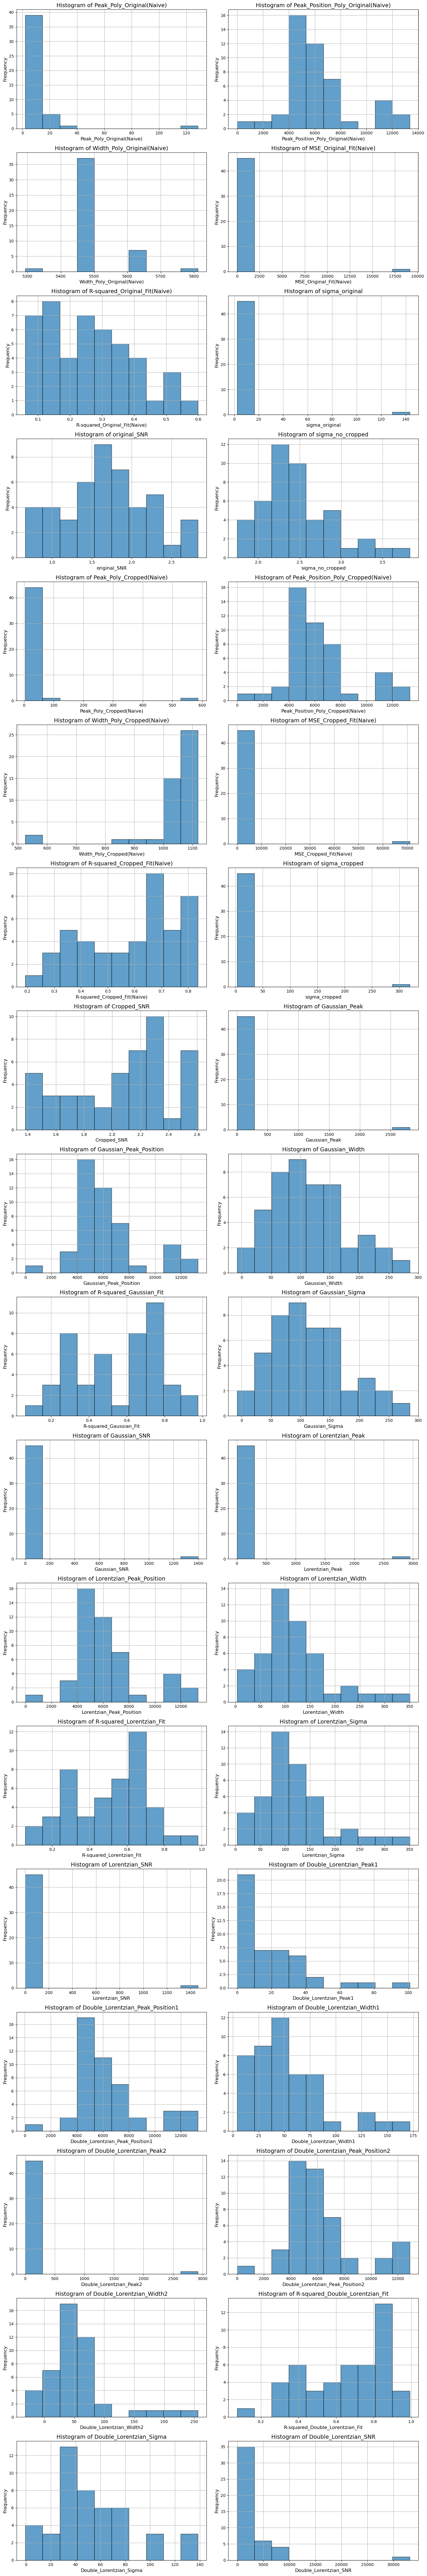

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

#-------- 1. Loading the Data and Specifying Columns of Interest ----------
file_name = "metrics_data_with_result.xlsx"
df = pd.read_excel(file_name)

columns_of_interest = [
    'Peak_Poly_Original(Naive)', 'Peak_Position_Poly_Original(Naive)', 'Width_Poly_Original(Naive)',
    'MSE_Original_Fit(Naive)', 'R-squared_Original_Fit(Naive)', 'sigma_original', 'original_SNR',
    'sigma_no_cropped', 'Peak_Poly_Cropped(Naive)', 'Peak_Position_Poly_Cropped(Naive)',
    'Width_Poly_Cropped(Naive)', 'MSE_Cropped_Fit(Naive)', 'R-squared_Cropped_Fit(Naive)',
    'sigma_cropped', 'Cropped_SNR', 'Gaussian_Peak', 'Gaussian_Peak_Position', 'Gaussian_Width',
    'R-squared_Gaussian_Fit', 'Gaussian_Sigma', 'Gaussian_SNR', 'Lorentzian_Peak',
    'Lorentzian_Peak_Position', 'Lorentzian_Width', 'R-squared_Lorentzian_Fit', 'Lorentzian_Sigma',
    'Lorentzian_SNR', 'Double_Lorentzian_Peak1', 'Double_Lorentzian_Peak_Position1',
    'Double_Lorentzian_Width1', 'Double_Lorentzian_Peak2', 'Double_Lorentzian_Peak_Position2',
    'Double_Lorentzian_Width2', 'R-squared_Double_Lorentzian_Fit', 'Double_Lorentzian_Sigma',
    'Double_Lorentzian_SNR'
]

#-------- 2. Filtering the Data ----------
for column in columns_of_interest:
    df = df[df[column].notna() & (df[column] != 0)]

#-------- 3. Setting Up the Histogram Parameters ----------
bins = 10
num_plots = len(columns_of_interest)
num_rows = (num_plots + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))

#-------- 4. Generating the Histograms ----------
for i, column in enumerate(columns_of_interest):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.hist(df[column], bins=bins, edgecolor='black', alpha=0.7)
    ax.set_title(f'Histogram of {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.grid(True)

#-------- 5. Handling Any Additional Plots if Number of Columns is Odd ----------
if num_plots % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

#-------- 6. Final Layout Adjustments and Display ----------
plt.tight_layout()
plt.show()


3. Finally, based on keywords such as "Peak", "SNR" or "Sigma", plots for analysis of the sequence of pre-processing is made.

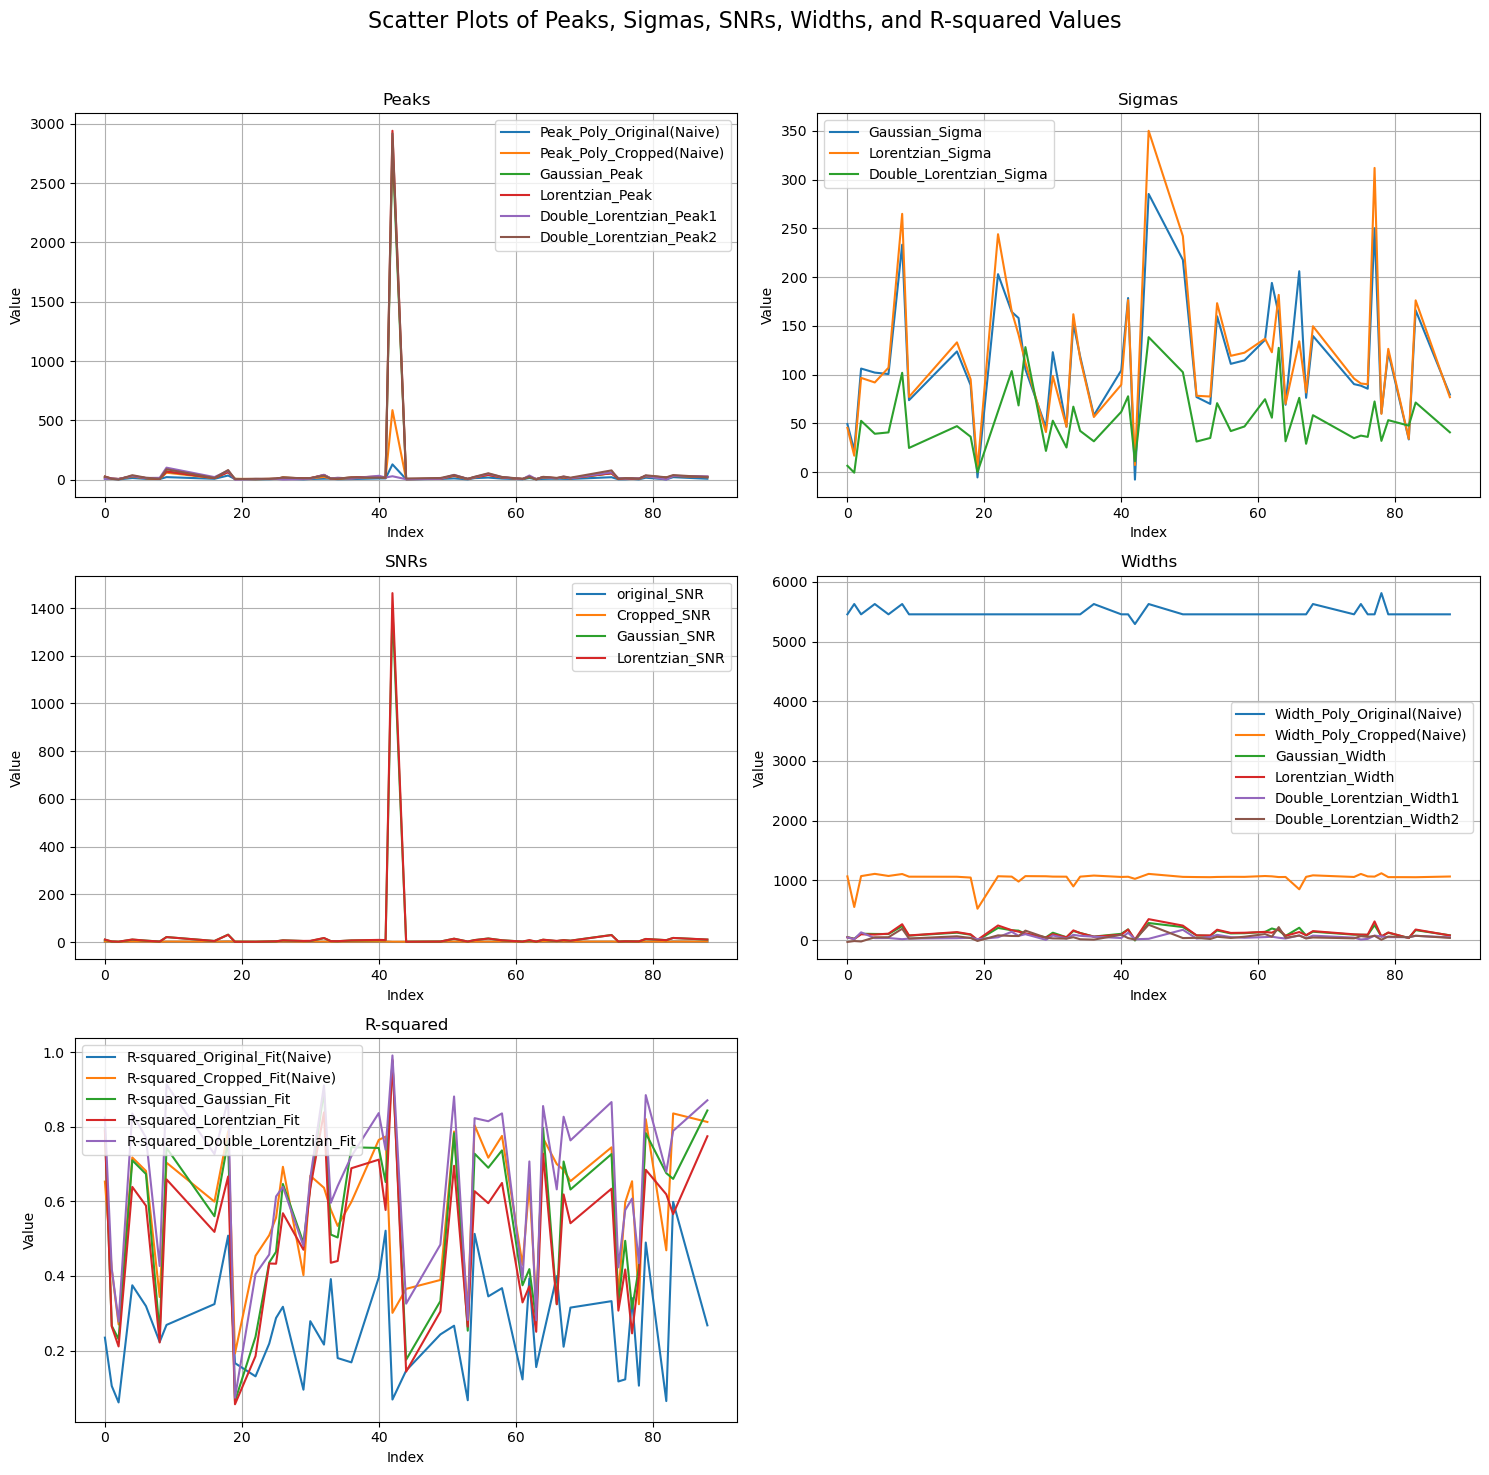

In [20]:
import matplotlib.pyplot as plt

#-------- 1. Loading the Data and Specifying Columns of Interest ----------
file_name = "metrics_data_with_result.xlsx"
df = pd.read_excel(file_name)

columns_of_interest = [
    'Peak_Poly_Original(Naive)', 'Peak_Position_Poly_Original(Naive)', 'Width_Poly_Original(Naive)',
    'MSE_Original_Fit(Naive)', 'R-squared_Original_Fit(Naive)', 'sigma_original', 'original_SNR',
    'sigma_no_cropped', 'Peak_Poly_Cropped(Naive)', 'Peak_Position_Poly_Cropped(Naive)',
    'Width_Poly_Cropped(Naive)', 'MSE_Cropped_Fit(Naive)', 'R-squared_Cropped_Fit(Naive)',
    'sigma_cropped', 'Cropped_SNR', 'Gaussian_Peak', 'Gaussian_Peak_Position', 'Gaussian_Width',
    'R-squared_Gaussian_Fit', 'Gaussian_Sigma', 'Gaussian_SNR', 'Lorentzian_Peak',
    'Lorentzian_Peak_Position', 'Lorentzian_Width', 'R-squared_Lorentzian_Fit', 'Lorentzian_Sigma',
    'Lorentzian_SNR', 'Double_Lorentzian_Peak1', 'Double_Lorentzian_Peak_Position1',
    'Double_Lorentzian_Width1', 'Double_Lorentzian_Peak2', 'Double_Lorentzian_Peak_Position2',
    'Double_Lorentzian_Width2', 'R-squared_Double_Lorentzian_Fit', 'Double_Lorentzian_Sigma',
    'Double_Lorentzian_SNR'
]

#-------- 2. Filtering the Data ----------
for column in columns_of_interest:
    df = df[df[column].notna() & (df[column] != 0)]

#-------- 3. Grouping Columns by Keywords ----------
groups = {
    'Peak': [col for col in columns_of_interest if 'Peak' in col],
    'Sigma': [col for col in columns_of_interest if 'Sigma' in col],
    'SNR': [col for col in columns_of_interest if 'SNR' in col],
    'Width': [col for col in columns_of_interest if 'Width' in col],
    'R-squared': [col for col in columns_of_interest if 'R-squared' in col]
}

#-------- 4. Setting Up Scatter Plots ----------
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Scatter Plots of Peaks, Sigmas, SNRs, Widths, and R-squared Values', fontsize=16)

# Plot for Peaks
ax = axes[0, 0]
ax.set_title('Peaks')
for column in groups['Peak']:
    if column != 'Double_Lorentzian_Peak_Position2' and column != 'Double_Lorentzian_Peak_Position1'and column != 'Gaussian_Peak_Position'and column != 'Lorentzian_Peak_Position'and column != 'Double_Lorentzian_Peak_Position1'and column != 'Peak_Position_Poly_Original(Naive)'and column != 'Peak_Position_Poly_Cropped(Naive)':
        try:
            ax.plot(df.index, df[column], label=column)
        except KeyError:
            print(f"Column '{column}' not found in the dataframe.")
    
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)

# Plot for Sigmas
ax = axes[0, 1]
ax.set_title('Sigmas')
for column in groups['Sigma']:
    ax.plot(df.index, df[column], label=column)
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)

# Plot for SNRs
ax = axes[1, 0]
ax.set_title('SNRs')
for column in groups['SNR']:
    if column != 'Double_Lorentzian_SNR':
        try:
            ax.plot(df.index, df[column], label=column)
        except KeyError:
            print(f"Column '{column}' not found in the dataframe.")
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)

# Plot for Widths
ax = axes[1, 1]
ax.set_title('Widths')
for column in groups['Width']:
    ax.plot(df.index, df[column], label=column)
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)

# Plot for R-squared
ax = axes[2, 0]
ax.set_title('R-squared')
for column in groups['R-squared']:
    ax.plot(df.index, df[column], label=column)
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)

# Remove the empty subplot
fig.delaxes(axes[2, 1])

#-------- 5. Final Layout Adjustments and Display ----------
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<div style="text-align: center;">
    <h2>CNN - ML TRAINING, CLASIFICATION AND EVALUATION</h2>
</div>

***

# Step 1: Installing Packages | PYTHON 3.0
***



In [ ]:
!pip install tslearn
!pip install tensorflow

Methods of classifciation: Spectral Clustering, K-MEANS, DBSCAN


<div style="text-align: center;">
    <h2>CNN - ML TRAINING, CLASIFICATION AND EVALUATION</h2>
</div>

***

# Step 2: "K_MEANS", "SPECTRAL_CLUSTERING", "DBSCAN"" Classification | PYTHON 3.0
***


Directorio actual: D:\1. JAE Intro ICU
Selected method for Classification: spectral_clustering
Total number of samples: 1000
Number of samples for group generation (0.25): 250
Number of samples for classification (0.75): 750


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


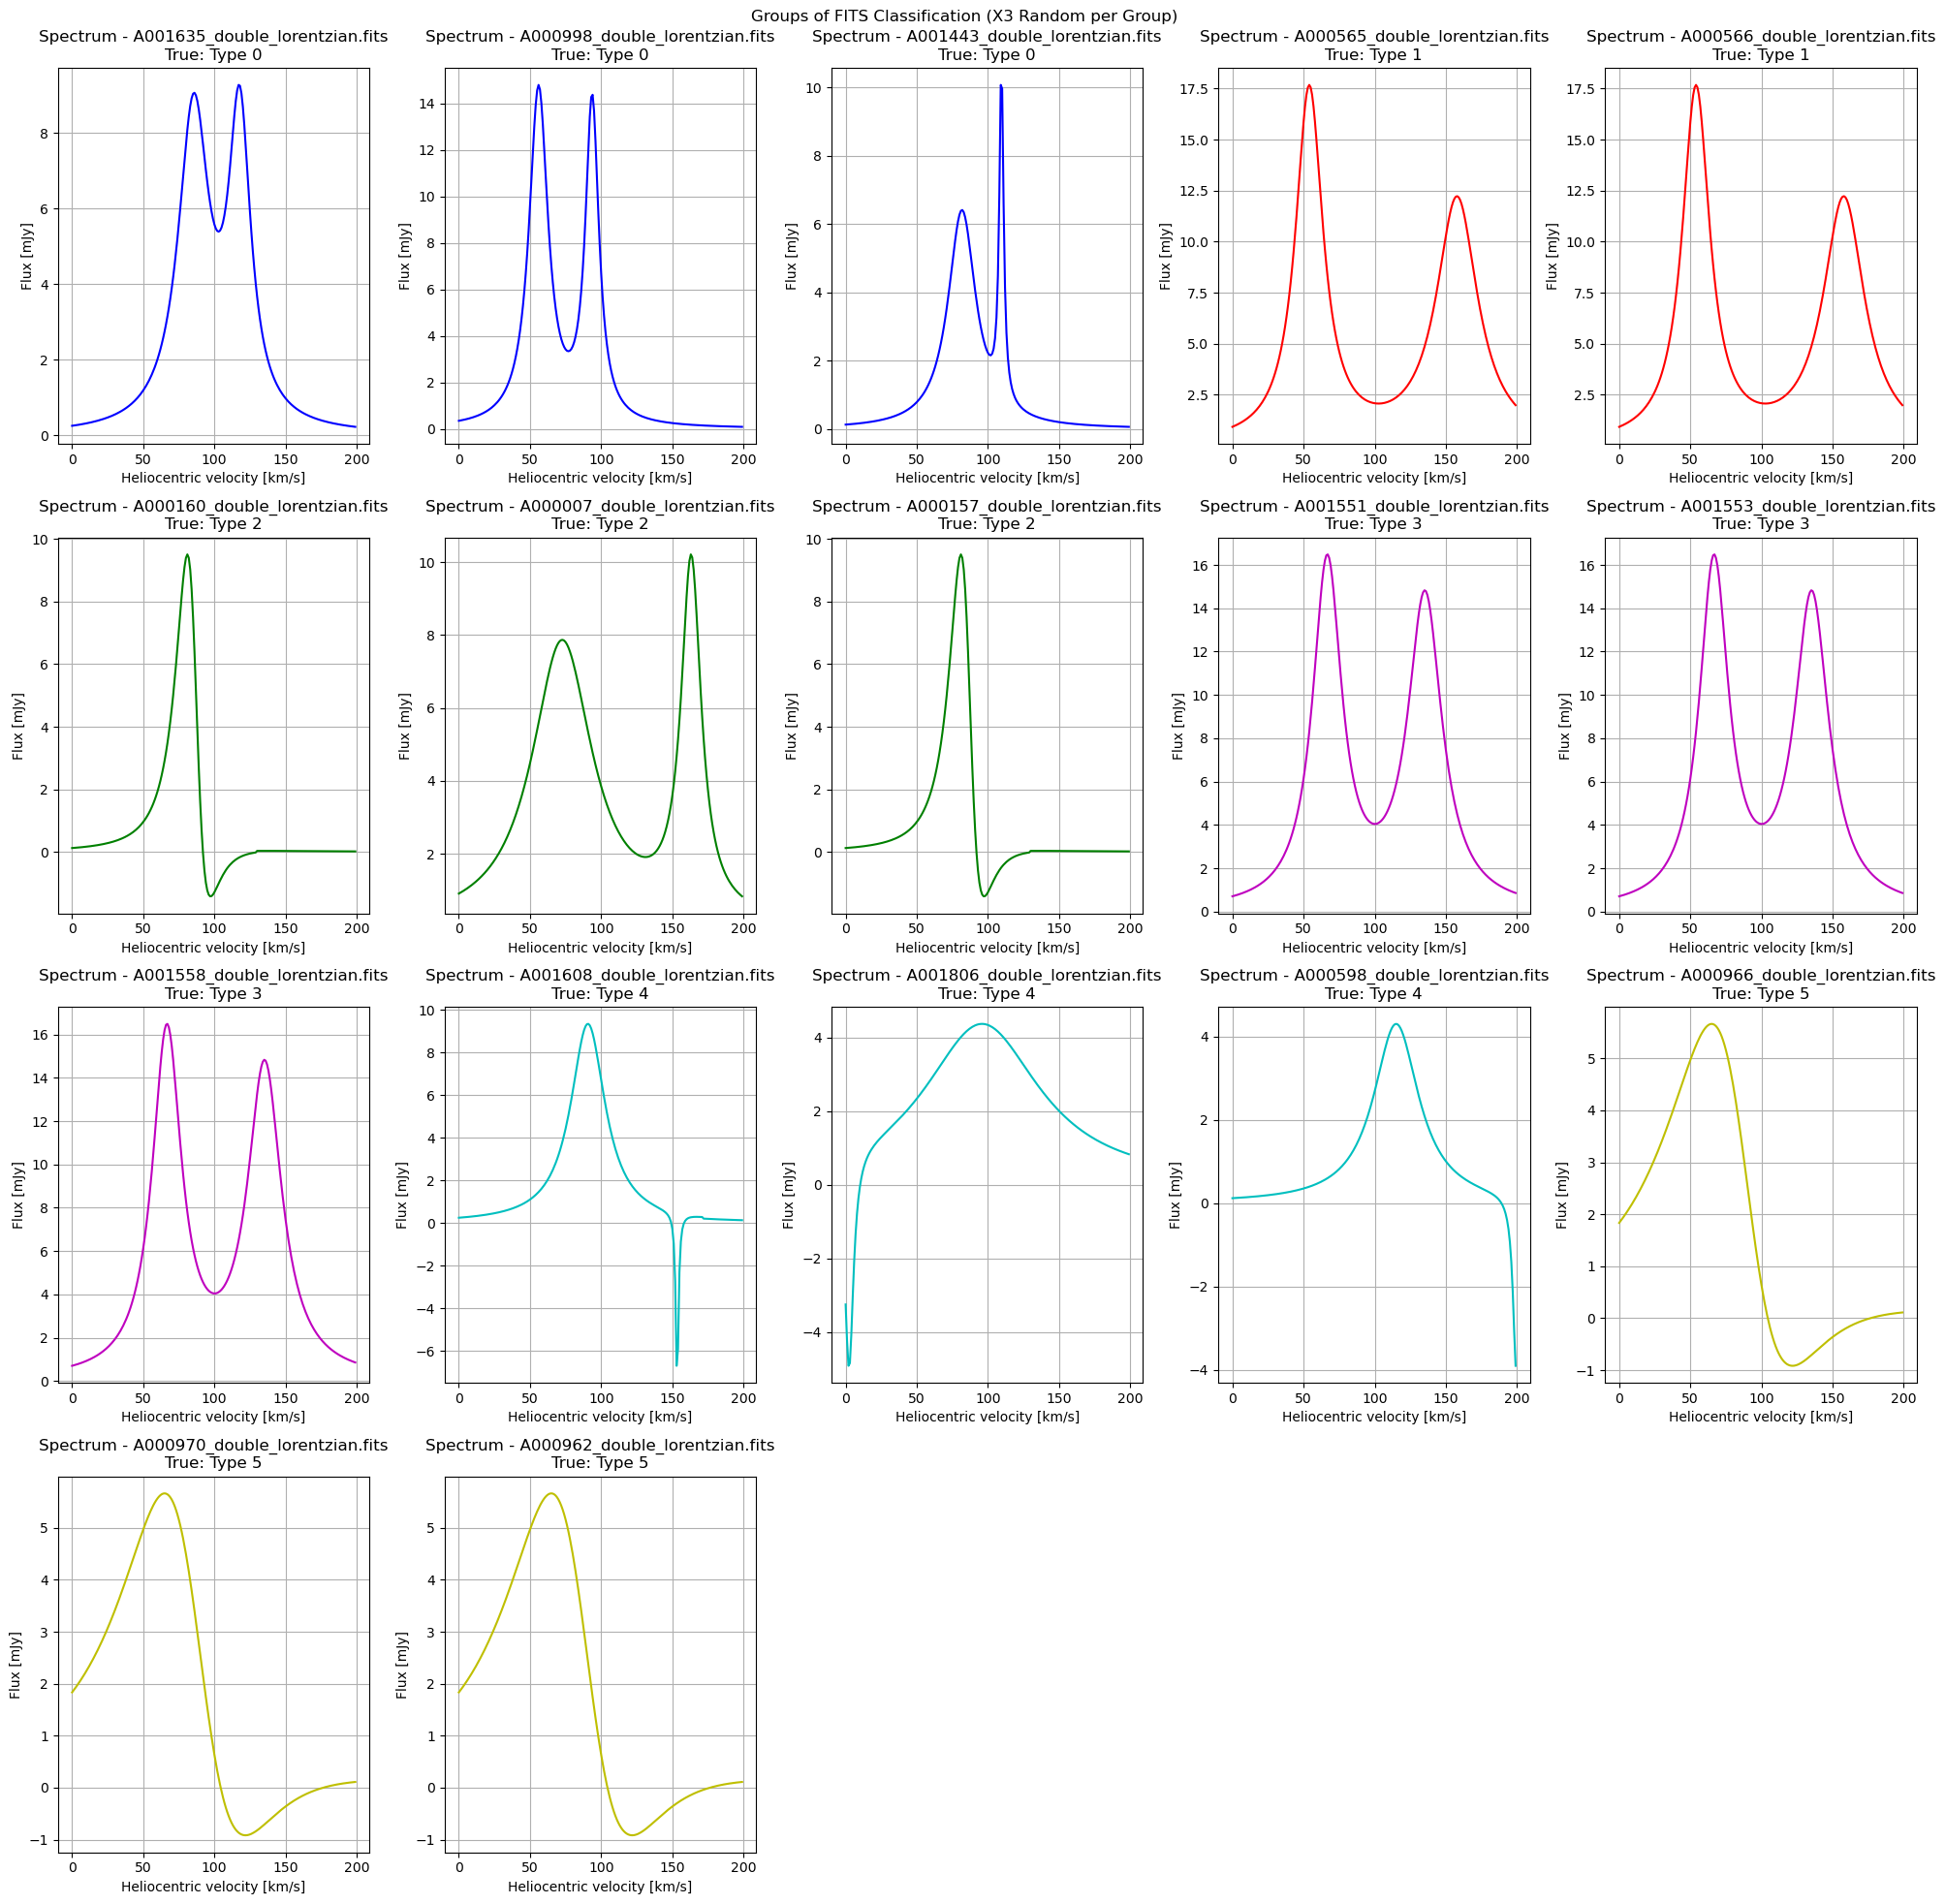

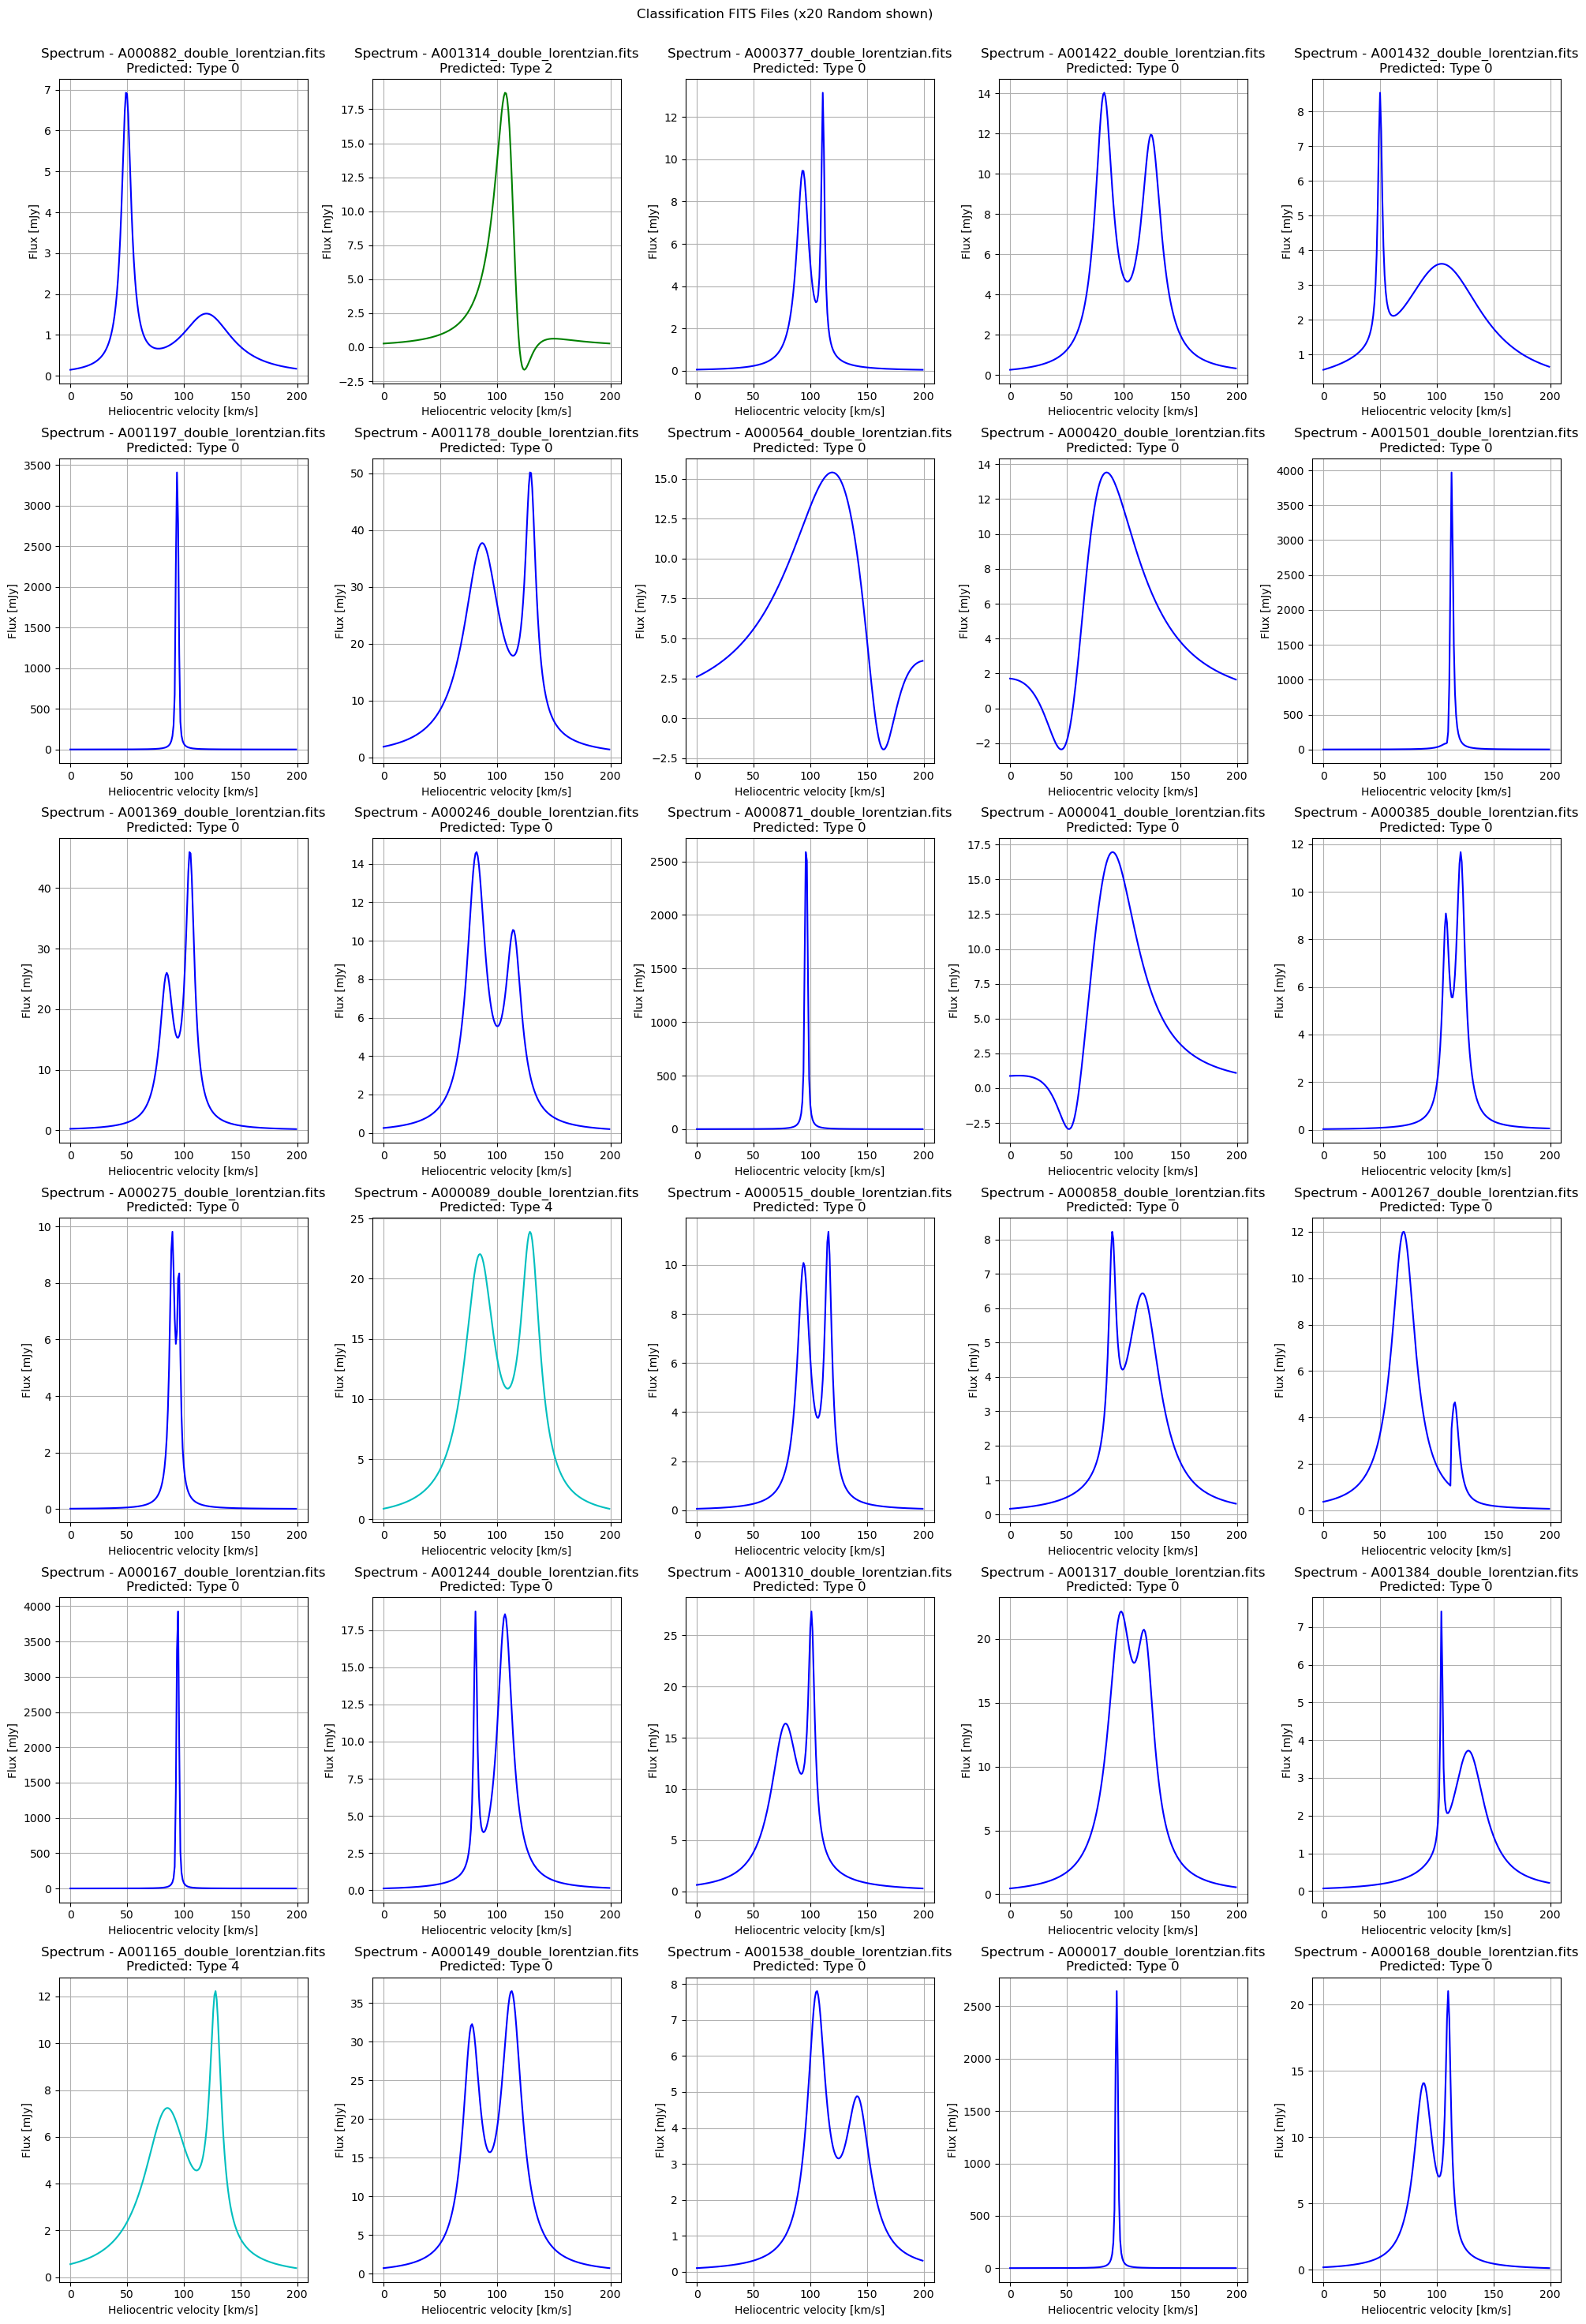

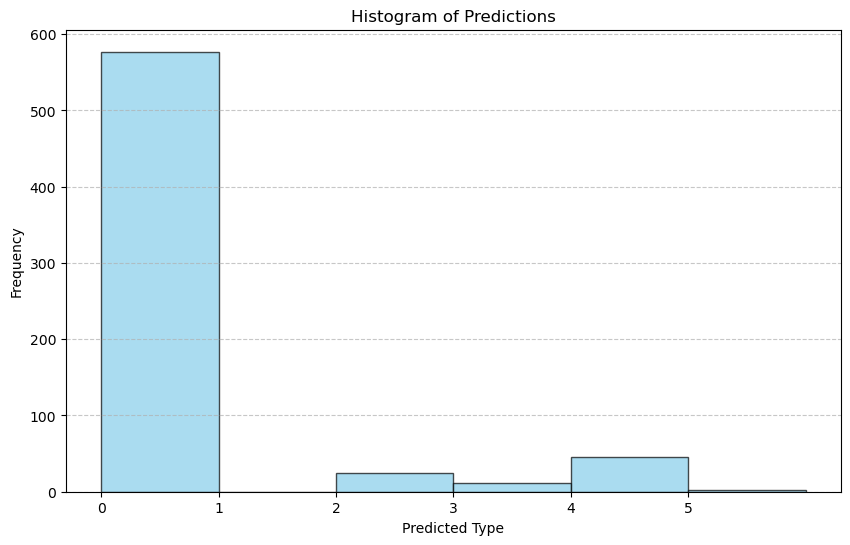


Confusion Matrix:
[[28  0  0  0  3  0]
 [ 2  0  0  0  0  0]
 [ 7  0  0  0  0  0]
 [13  0  0  0  0  0]
 [ 3  0  0  0 27  0]
 [ 0  0  0  0  5  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.90      0.67        31
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        13
           4       0.77      0.90      0.83        30
           5       0.00      0.00      0.00         5

    accuracy                           0.62        88
   macro avg       0.22      0.30      0.25        88
weighted avg       0.45      0.62      0.52        88



C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
import numpy as np
from astropy.io import fits
from tslearn.shapelets import LearningShapelets
from tslearn.preprocessing import TimeSeriesScalerMinMax
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import glob
import os
import random

#-------- 1. FITS Data Loading ----------

# Variables for Training
clustering_method = "spectral_clustering"  # Specify clustering method: "k_means", "spectral_clustering", "DBSCAN"
type_of_classification = "double_lorentzian"    # cropped, lorentzian, double_lorentzian 
number_max_fits = 1000     # LImit max numbar of .fits to process
percentage_training = 0.25  # Percentage of the samples for training
ngroups = 6  # Number of groups for classification

# Change directory to FITS data location
os.chdir(os.path.abspath(os.sep))
current_directory = os.getcwd()
print("Current Directory:", current_directory)
image_directory = f'1. JAE Intro ICU/sp_im/sp_im_{type_of_classification}'
os.chdir(test_file_paths)

# Define a function to load data from FITS files
def load_fits_data(file_path):
    with fits.open(file_path) as hdul:
        data = hdul[0].data[0]  # Get data from the first HDU
    return data

# List FITS files ending with "*_cropped.fits"
file_paths_total = glob.glob(f'*_{type_of_classification}.fits')
file_paths_total.sort()

# Limit the number of files to process (if needed)
file_paths_total = file_paths_total[:number_max_fits]  # Modify as necessary

random.shuffle(file_paths_total)
file_paths_for_groups = file_paths_total[:round(len(file_paths_total) * percentage_training)]
file_paths = file_paths_total[round(len(file_paths_total) * percentage_training):]

print("Selected method for Classification:", clustering_method)
print("Total number of samples:", len(file_paths_total))
print("Number of samples for group generation (" + str(percentage_training) + "):", len(file_paths_for_groups))
print("Number of samples for classification (" + str(1 - percentage_training) + "):", len(file_paths))

lgroups = round(len(file_paths) * percentage_training / ngroups)  # Number of files per group (1/4 of FITS)

# Ensure there are enough files for the defined groups
assert ngroups * lgroups <= len(file_paths), "Not enough files for the defined groups"

#-------- 2. Data Preprocessing ----------
def preprocess_data(file_paths):
    X_all = []
    max_length = 0
    for file in file_paths:
        data = load_fits_data(file)
        if data is not None and len(data) > 0:
            X_all.append(data)
            if len(data) > max_length:
                max_length = len(data)
    # Pad or truncate sequences
    X_all = [seq[:max_length] if len(seq) > max_length else np.pad(seq, (0, max_length - len(seq))) for seq in X_all]
    return X_all, max_length

X_all, max_length = preprocess_data(file_paths)

# Normalization
scaler = TimeSeriesScalerMinMax()
X_all_scaled = scaler.fit_transform(np.array(X_all, dtype=np.float64))

# Ensure X_all_scaled is two-dimensional
X_all_scaled = X_all_scaled.reshape(X_all_scaled.shape[0], -1)

# Apply selected clustering method
if clustering_method == "k_means":
    # Apply K-means clustering to group spectra with similar characteristics
    clustering_model = KMeans(n_clusters=ngroups, random_state=0)
elif clustering_method == "spectral_clustering":
    # Apply Spectral Clustering
    clustering_model = SpectralClustering(n_clusters=ngroups, random_state=0)
elif clustering_method == "DBSCAN":
    # Apply DBSCAN
    clustering_model = DBSCAN(eps=0.5, min_samples=5)

y_all = clustering_model.fit_predict(X_all_scaled)

# Check if clustering was successful
if len(set(y_all)) < ngroups:
    raise ValueError("El método de clustering no generó suficientes grupos.")

# Select the first `ngroups * lgroups` files for training
X_train = []
y_train = []
for group in range(ngroups):
    indices = np.where(y_all == group)[0][:lgroups]
    if len(indices) > 0:
        X_train.extend([X_all[idx] for idx in indices])
        y_train.extend([group] * len(indices))
    else:
        print(f"Grupo {group} está vacío y no se incluirá en el entrenamiento.")

# Use the remaining files for testing
X_test = [X_all[idx] for idx in range(len(X_all)) if idx not in np.concatenate([np.where(y_all == group)[0][:lgroups] for group in range(ngroups)])]

# Ensure all sequences have the same length
X_train = [seq[:max_length] if len(seq) > max_length else np.pad(seq, (0, max_length - len(seq))) for seq in X_train]
X_test = [seq[:max_length] if len(seq) > max_length else np.pad(seq, (0, max_length - len(seq))) for seq in X_test]

# Verificar si X_train y y_train no están vacíos
if not X_train or not y_train:
    raise ValueError("X_train o y_train están vacíos. Verifique los datos de entrada.")

# Asegurar que X_train es un array de 2 dimensiones
X_train = np.array(X_train, dtype=np.float64)
if X_train.ndim == 1:
    X_train = X_train.reshape(-1, 1)

# Verificar la longitud de y_train
if len(y_train) != len(X_train):
    raise ValueError("La longitud de y_train no coincide con la longitud de X_train.")

# Convertir y_train a un array numpy si no lo es
y_train = np.array(y_train)

# Define colors for each group
colors = ['b', 'r', 'g', 'm', 'c', 'y', 'k', 'orange']  # Extend this list if you have more than 8 groups

#-------- 3. Model Training ----------
# Train shapelets model
model = LearningShapelets(n_shapelets_per_size={100: 10, 50: 8, 30: 5, 10: 3}, max_iter=350, batch_size=10, scale=True)
model.fit(X_train, y_train)

#-------- 4. FITS Files Visualization ----------
def plot_fits_spectra(file_paths, title, labels=None, predictions=None, num_columns=5):
    num_files = len(file_paths)
    num_rows = (num_files + num_columns - 1) // num_columns
    plt.figure(figsize=(20, 5*num_rows))
    plt.suptitle(title)
    for i, file_path in enumerate(file_paths, 1):
        with fits.open(file_path) as fits_file:
            spectrum_data = fits_file[0].data
            spectrum_data = np.squeeze(spectrum_data)
        wavelength = np.arange(len(spectrum_data))
        plt.subplot(num_rows, num_columns, i)
        if predictions is not None:
            color = colors[predictions[i-1]]
            label = f'Predicted: Type {predictions[i-1]}'
        elif labels is not None:
            color = colors[labels[i-1]]
            label = f'True: Type {labels[i-1]}'
        else:
            color = 'b'
            label = ''
        plt.plot(wavelength, spectrum_data, color=color)
        plt.xlabel('Heliocentric velocity [km/s]')
        plt.ylabel('Flux [mJy]')
        plt.title(f'Spectrum - {file_path}\n{label}')
        plt.grid(True)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

def plot_fits_spectra_random(file_paths, title, labels=None, predictions=None, num_columns=5, num_plots=30):
    num_rows = (num_plots + num_columns - 1) // num_columns
    plt.figure(figsize=(20, 5 * num_rows))
    plt.suptitle(title)
    random_indices = np.random.choice(len(file_paths), num_plots, replace=False)
    for i, idx in enumerate(random_indices, 1):
        file_path = file_paths[idx]
        with fits.open(file_path) as hdul:
            data_spectrum = hdul[0].data
            data_spectrum = np.squeeze(data_spectrum)
        velocity = np.arange(len(data_spectrum))
        plt.subplot(num_rows, num_columns, i)
        if predictions is not None:
            color = colors[predictions[idx]]
            label = f'Predicted: Type {predictions[idx]}'
        elif labels is not None:
            color = colors[labels[idx]]
            label = f'True: Type {labels[idx]}'
        else:
            color = 'b'
            label = ''
        plt.plot(velocity, data_spectrum, color=color)
        plt.xlabel('Heliocentric velocity [km/s]')
        plt.ylabel('Flux [mJy]')
        plt.title(f'Spectrum - {file_path}\n{label}')
        plt.grid(True)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

def plot_random_samples_per_group(file_paths, y_all, y_train, ngroups, num_samples=3):
    selected_files = []
    selected_labels = []
    
    for group in range(ngroups):
        group_indices = np.where(y_all == group)[0]
        # Adjust num_samples if it is greater than the size of group_indices
        actual_num_samples = min(num_samples, len(group_indices))
        
        if actual_num_samples > 0:
            selected_indices = np.random.choice(group_indices, actual_num_samples, replace=False)
            selected_files.extend([file_paths[idx] for idx in selected_indices])
            selected_labels.extend([group] * actual_num_samples)
        else:
            print(f"Warning: Group {group} does not have enough elements to select {num_samples} samples.")

    plot_fits_spectra(selected_files, title="Groups of FITS Classification (X3 Random per Group)", labels=selected_labels)

plot_random_samples_per_group(file_paths, y_all, y_train, ngroups)

#-------- 5. Model Evaluation ----------
X_test_scaled = scaler.transform(np.array(X_test, dtype=np.float64))
X_test_transformed = model.transform(X_test_scaled)

# Classification using KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(model.transform(X_train), y_train)
y_pred = knn.predict(X_test_transformed)

# Visualize test data with predictions
test_file_paths = [file_paths[idx] for idx in range(len(file_paths)) if idx not in np.concatenate([np.where(y_all == group)[0][:lgroups] for group in range(ngroups)])]
plot_fits_spectra_random(test_file_paths, title="Classification FITS Files (x20 Random shown)", predictions=y_pred, num_columns=5, num_plots=30)

#-------- 6. Classification Results ----------

plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=range(ngroups + 1), color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Predictions')
plt.xlabel('Predicted Type')
plt.ylabel('Frequency')
plt.xticks(range(ngroups))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

file_path = os.path.join(os.pardir, os.pardir, f'classification_results_shapelets_{clustering_method}_{type_of_classification}.dat')

with open(file_path, "w") as f:
    f.write("Classification Results:\n")
    for file, prediction in zip(test_file_paths, y_pred):
        prediction_label = f"Type {prediction}"
        f.write(f"File: {file}, Prediction: {prediction_label}\n")

print("\nConfusion Matrix:")
print(confusion_matrix(y_train, model.predict(X_train)))
print("\nClassification Report:")
print(classification_report(y_train, model.predict(X_train)))




# Step 3: CNN's Classification | PYTHON 3.0
***



Current Directory: D:\


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Epoch 1/50


C:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.3007 - loss: 2.4463 - val_accuracy: 0.4573 - val_loss: 1.5794
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.5513 - loss: 1.4468 - val_accuracy: 0.4573 - val_loss: 1.6531
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.4720 - loss: 1.5655 - val_accuracy: 0.4573 - val_loss: 1.6279
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5046 - loss: 1.4924 - val_accuracy: 0.4573 - val_loss: 1.6313
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.4859 - loss: 1.5052 - val_accuracy: 0.4573 - val_loss: 1.6146
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5169 - loss: 1.4695 - val_accuracy: 0.4573 - val_loss: 1.6375
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5096 - loss: 1.4425 - val_accuracy: 0.4573 - val_loss: 1.4437
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.4573 - loss: 1.5469 - val_accuracy: 0.4573 - val_loss: 1

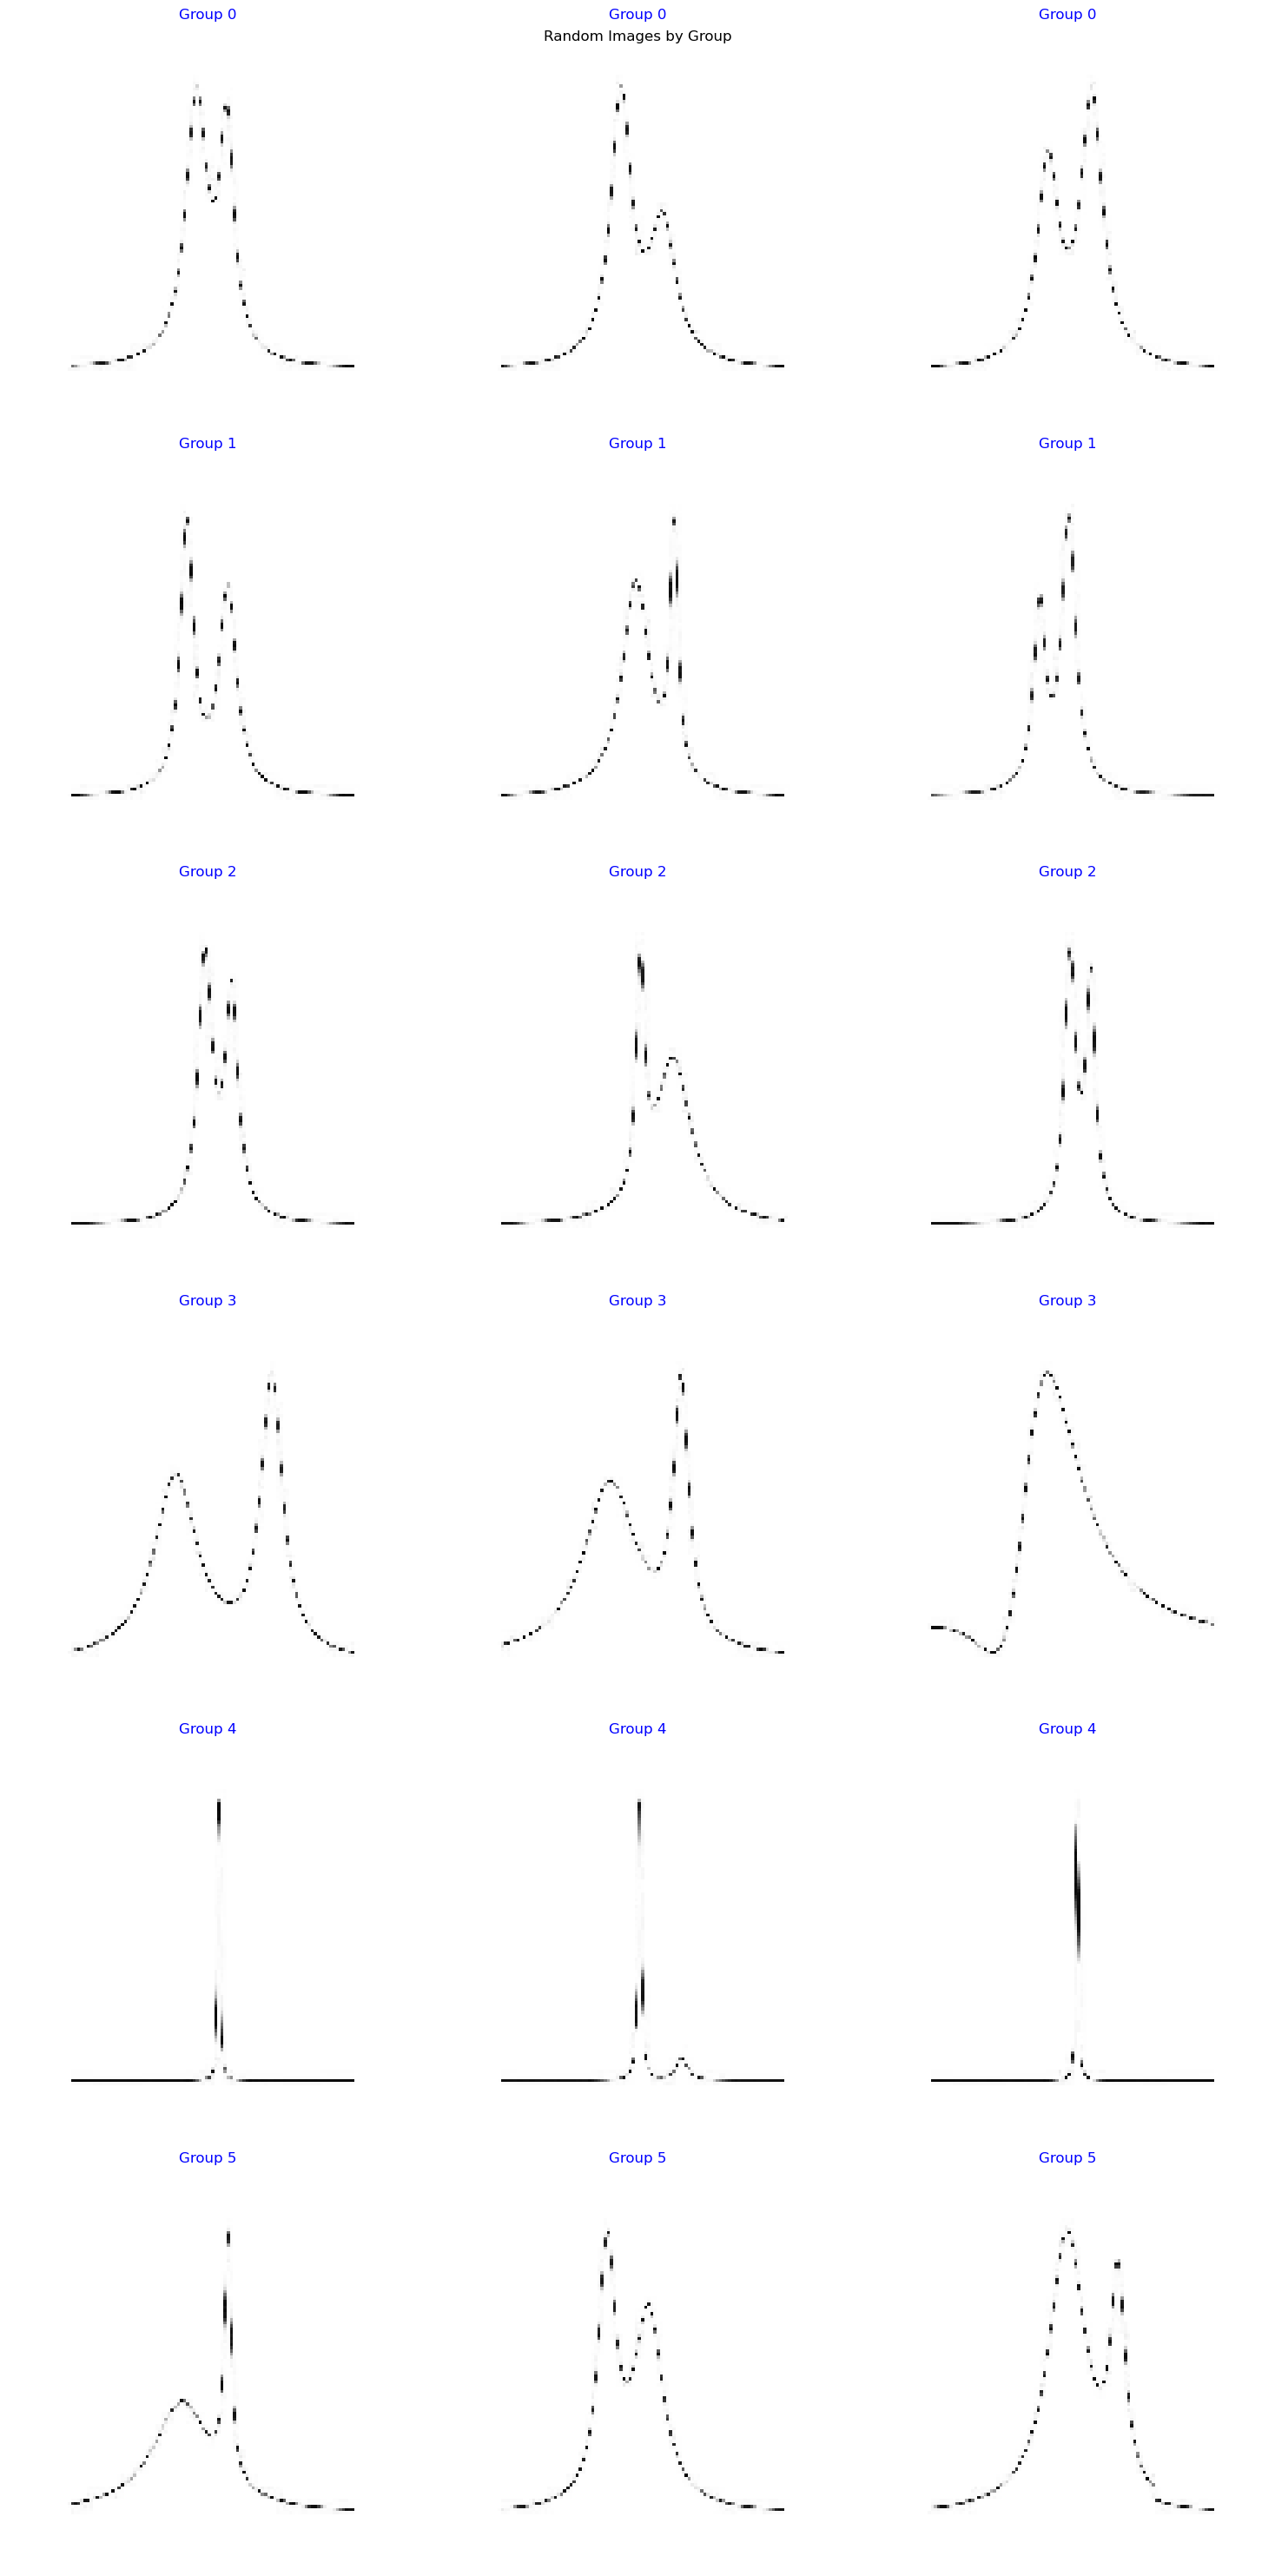

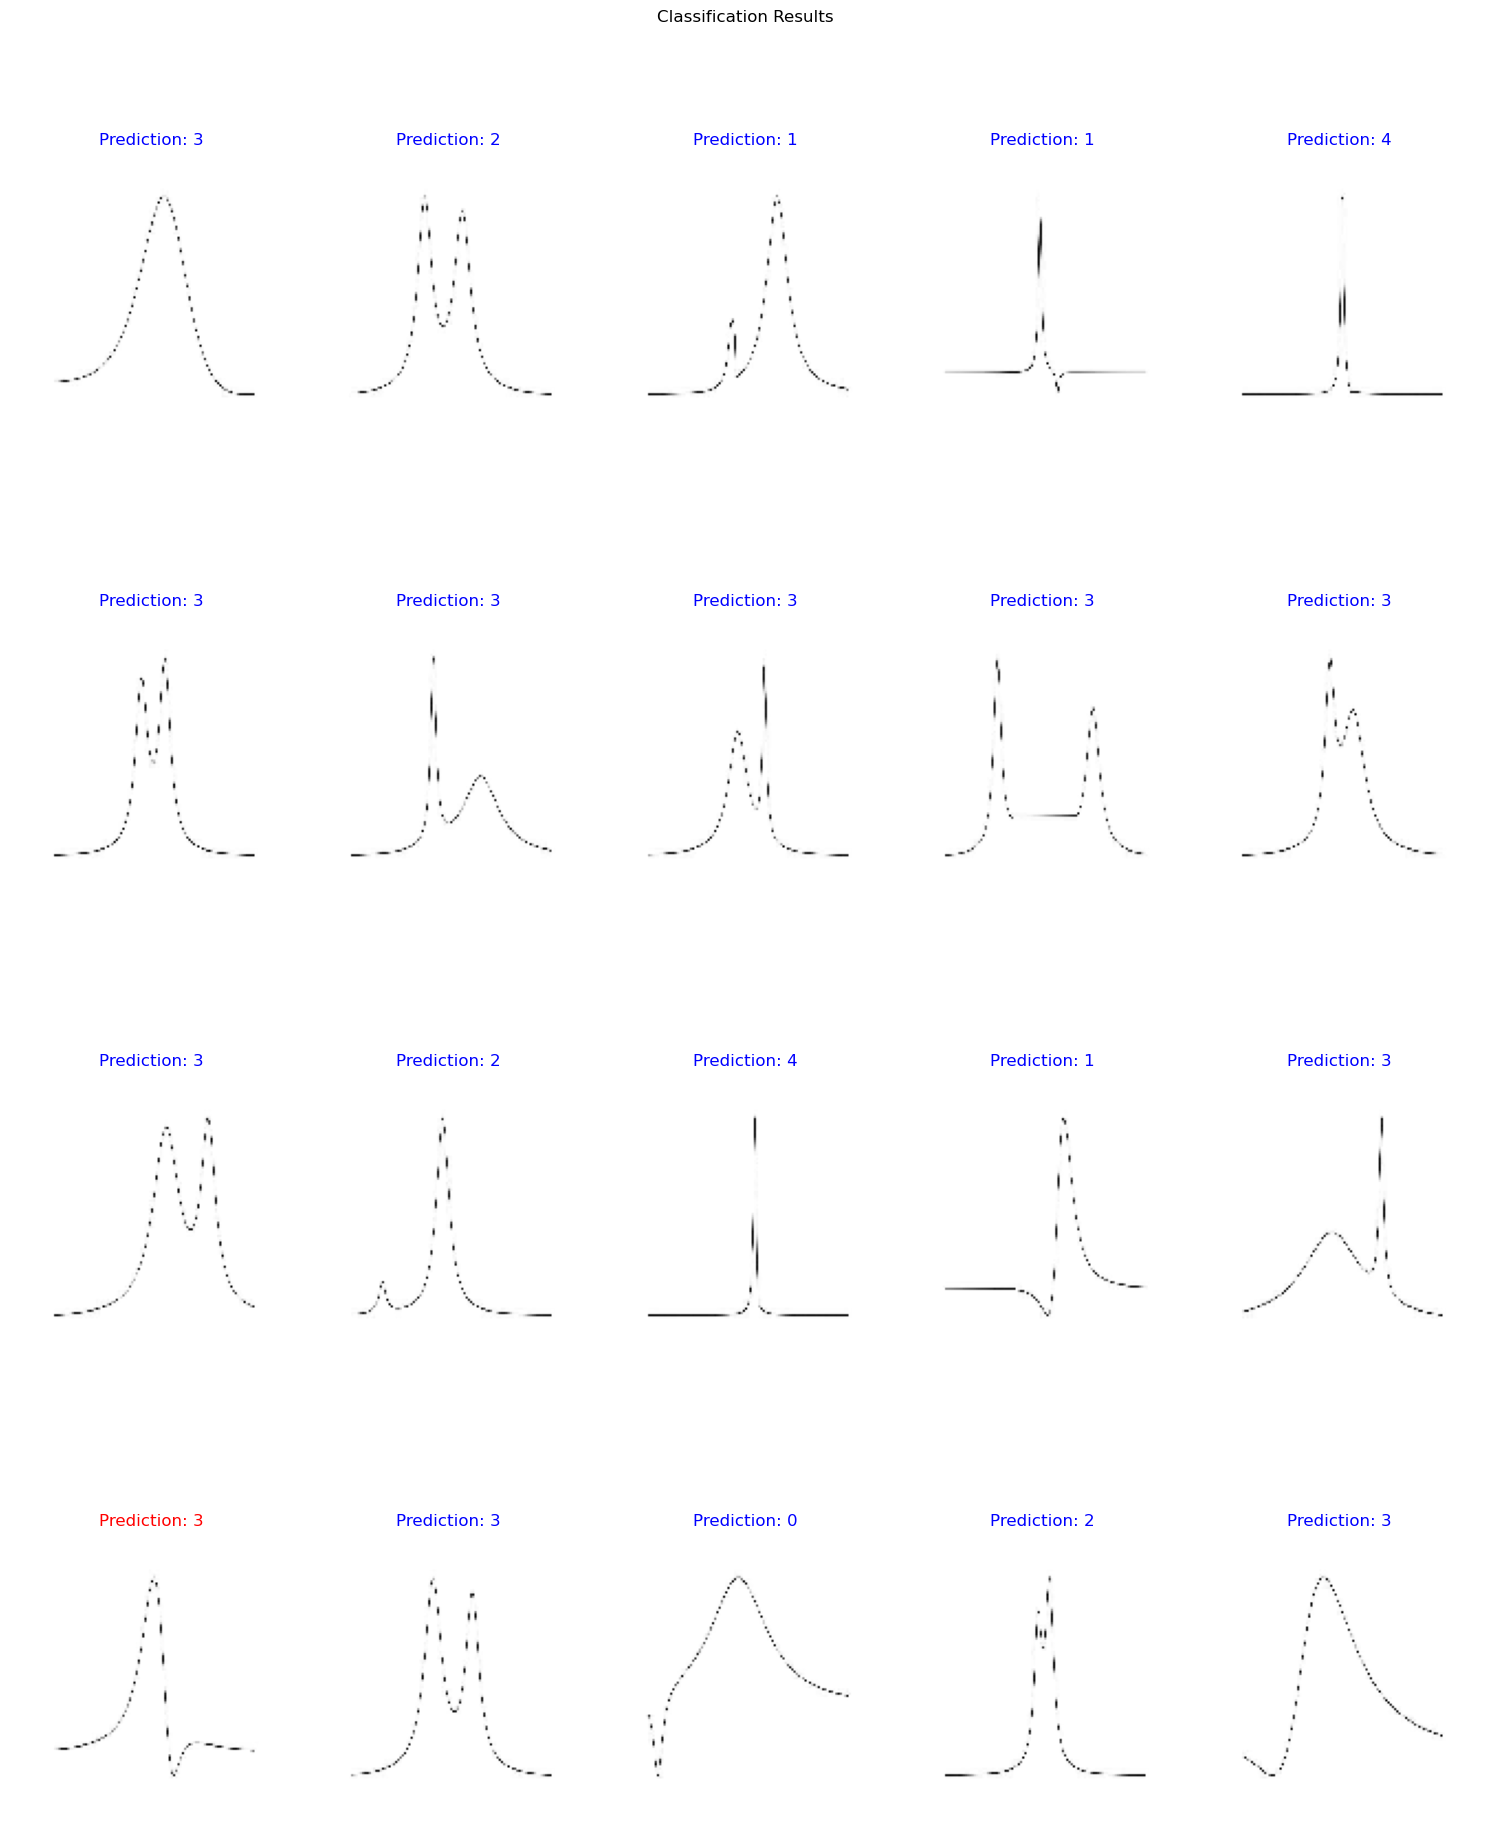

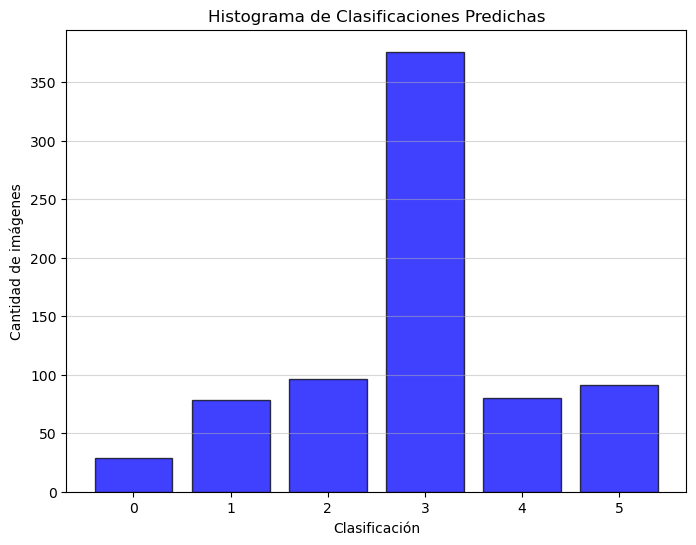

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
import random

# Variables
type_of_classification = "double_lorentzian"    # cropped, lorentzian, double_lorentzian 
percentage_training = 0.25  # Percentage of the samples for training
ngroups = 6  # Number of groups for classification
num_images_to_visualize = 20  # Number of images to visualize for classification

# Directory where images are located

os.chdir(os.path.abspath(os.sep))
current_directory = os.getcwd()
print("Current Directory:", current_directory)
image_directory = f'1. JAE Intro ICU/sp_im/sp_im_{type_of_classification}'

# Change directory to image directory
os.chdir(image_directory)

# Function to load JPEG data
def load_jpeg_data(file_path, target_size=(128, 128)):
    img = load_img(file_path, target_size=target_size, color_mode='grayscale')
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Get JPEG file paths
jpeg_file_paths = glob.glob(f'*_{type_of_classification}.jpeg')
jpeg_file_paths.sort()
jpeg_file_paths = jpeg_file_paths[:1000]
random.shuffle(jpeg_file_paths)  # Shuffle paths randomly

# Determine the number of samples for training and testing
num_total_samples = len(jpeg_file_paths)
num_training_samples = int(num_total_samples * percentage_training)
num_testing_samples = num_total_samples - num_training_samples

# Ensure enough images for training and testing
if num_training_samples == 0 or num_testing_samples == 0:
    raise ValueError("Not enough images to split into training and testing sets based on the provided percentage.")

# Load all images for clustering
all_images = np.array([load_jpeg_data(file) for file in jpeg_file_paths])

# Perform clustering to group images
kmeans = KMeans(n_clusters=ngroups, random_state=42)
cluster_labels = kmeans.fit_predict(all_images.reshape(-1, 128*128))

# Images for training and testing
X_train = all_images[:num_training_samples]
y_train = cluster_labels[:num_training_samples]
X_test = all_images[num_training_samples:num_training_samples + num_testing_samples]
y_test = cluster_labels[num_training_samples:num_training_samples + num_testing_samples]

# One-hot encode labels
y_train_categorical = to_categorical(y_train, num_classes=ngroups)
y_test_categorical = to_categorical(y_test, num_classes=ngroups)

# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(ngroups, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_categorical, epochs=50, batch_size=16, validation_data=(X_test, y_test_categorical))

# Evaluate the model
y_pred_categorical = model.predict(X_test)
y_pred = np.argmax(y_pred_categorical, axis=1)

# Define the .dat file name where the results will be saved
file_path = os.path.join(os.pardir, os.pardir, f'classification_results_CNN_{type_of_classification}.dat')

# Open the .dat file in write mode
with open(file_path, "w") as f:
    # Write the header to the file
    f.write("Classification Results:\n")
    
    # Write the classification results to the file
    for file, prediction, true_label in zip(jpeg_file_paths[num_training_samples:num_training_samples + num_testing_samples], y_pred, y_test):
        prediction_label = f"Type {prediction}"
        true_label_str = f"Type {true_label}"
        f.write(f"File: {file}, Prediction: {prediction_label}, True Label: {true_label_str}\n")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualization of random images from each group
def plot_random_images_by_group(file_paths, labels, num_images_per_group=3, title="Random Images by Group", num_columns=3):
    unique_labels = np.unique(labels)
    num_rows = num_images_per_group * len(unique_labels) // num_columns + 1
    plt.figure(figsize=(15, 5 * num_rows))
    plt.suptitle(title)
    for i, label in enumerate(unique_labels):
        image_indices = np.where(labels == label)[0]
        random.shuffle(image_indices)
        for j in range(num_images_per_group):
            if j < len(image_indices):
                img = load_img(file_paths[image_indices[j]], target_size=(128, 128), color_mode='grayscale')
                img_array = img_to_array(img) / 255.0
                plt.subplot(num_rows, num_columns, i * num_images_per_group + j + 1)
                plt.imshow(img_array.squeeze(), cmap='gray')
                plt.axis('off')
                plt.title(f'Group {label}', color='blue')
    plt.tight_layout()
    plt.show()

# Visualization of classification results
def plot_classification_results(file_paths, predictions, labels, title="Classification Results", num_columns=5):
    num_files = len(file_paths)
    num_rows = (num_files + num_columns - 1) // num_columns
    plt.figure(figsize=(15, 5 * num_rows))
    plt.suptitle(title)
    for i in range(num_files):
        img = load_img(file_paths[i], target_size=(128, 128), color_mode='grayscale')
        img_array = img_to_array(img) / 255.0
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(img_array.squeeze(), cmap='gray')
        plt.axis('off')
        color = 'blue' if predictions[i] == labels[i] else 'red'
        plt.title(f'Prediction: {predictions[i]}', color=color)
        plt.xlabel(file_paths[i])
    plt.tight_layout()
    plt.show()

# Randomly select images for visualization
random_test_indices = random.sample(range(num_training_samples, num_training_samples + num_testing_samples), num_images_to_visualize)

# Plot random images by group
plot_random_images_by_group(jpeg_file_paths, cluster_labels)

# Plot classification results
plot_classification_results([jpeg_file_paths[i] for i in random_test_indices], y_pred, y_test)

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=np.arange(ngroups+1)-0.5, rwidth=0.8, alpha=0.75, color='blue', edgecolor='black')
plt.xticks(range(ngroups))
plt.xlabel('Clasificación')
plt.ylabel('Cantidad de imágenes')
plt.title('Histograma de Clasificaciones Predichas')
plt.grid(axis='y', alpha=0.5)
plt.show()